<a href="https://colab.research.google.com/github/mobius29er/youtubeExtractor/blob/main/YoutubeExtractorAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Research Question
Can the success of a YouTube video, measured by normalized viewership and a custom-developed engagement score, be predicted and replicated by analyzing patterns in its metadata, thumbnail and video structure?
Expected Data Sources
The data will be sourced from the public-facing pages of approximately 1,000 YouTube videos from 25 creators across five distinct genres (Challenge/Stunts, Christian, Education/Science, Gaming, and Kids/Family). This will include scraping video metadata (titles, tags, views, likes, comments, duration, publication date), channel subscriber counts, thumbnail images, and the first 30 seconds of video transcripts to analyze the "hook" (if time allows).
Expected Techniques
The analysis will use a combination of unsupervised and supervised learning techniques:
Pandas: For comprehensive data cleaning, merging, and feature engineering, including the calculation of a custom "Retention Quality Score" based on like/view ratios, comment/view ratios, and sentiment analysis of comments.
Unsupervised Learning (like K-Means Clustering & PCA): K-Means will be used to group videos based on shared characteristics in their thumbnails, hooks, and engagement profiles, thereby identifying distinct "types" of successful content. PCA will help reduce the dimensionality of the feature set and identify the most influential underlying factors.
Supervised Learning (like Regression Model): As a complementary approach, a regression model (such as Linear Regression or Gradient Boosting) will be trained to predict a video's potential view count based on its pre-upload features (title characteristics, thumbnail properties, hook analysis). This will help validate the findings from the unsupervised models and provide a direct predictive tool.
Expected Results
I expect to identify and define several distinct, replicable "success signatures" or patterns that correlate with high viewership and engagement. The analysis should reveal that top-performing videos, regardless of genre, share common, quantifiable characteristics in their titles, thumbnail compositions, and introductory hooks. The expected outcome is a dual framework: one that classifies videos into performance clusters and another that predicts potential viewership, providing data-driven recommendations for optimization.
Importance of This Question
Countless creators invest significant time and resources into YouTube with inconsistent results, often relying on intuition rather than data. This research aims to demystify viral success by translating the implicit strategies of top creators into an explicit, actionable framework. Answering this question will provide aspiring and established creators with a data-driven guide to content strategy, helping them optimize their videos for better performance, leading to increased viewership, audience growth, and higher potential earnings. The benefit extends beyond individual creators, offering a clearer understanding of what captures audience attention in the digital age, which is invaluable for marketers, educators, and entertainers alike. By providing a "formula" for success, this analysis can help level the playing field and empower smaller creators to compete more

Data Needed:
Videos
1,000 public YouTube videos breakdown (prioritizing videos 90 days or older):
5 genres
Challenge/Stunts
Catholic
Education/Science
Gaming
Kids/Family
5 creators per genre
40 videos per creator
10 of the top videos by view count
10 of the bottom videos by view count
20 randomly selected excluding the top and bottom 10% of videos
Basic metadata


title - could impact the CTR and impressions
tags - could impact impressions
views - provides performance
likes - indicator for retention
comments -  indicator for retention
duration - may impact retention
publish date - to check to ensure video has aged enough to normalize


Other Metrics:
Channel subscriber counts to normalize performance across creators to calculate Retention Quality Score
Retention Quality Score - Needed since we don't have access to analytics from each Creator to see viewer retention
Like Ratio - Likes/Views - 30%
Comment Ratio - Comments/Views - 20%
Views per subscribers - Views/Subscribers - 25%
Sentiment Score: Average positive/neutral/negative of top 100 comments - 15%
Comment Depth: Length of Comments and any timestamps (indicating viewer retention especially for later time stamps) - 10%
Thumbnail images - Impacts CTR (click through Rates)
Transcripts - video structure (may or may not depending on processing requirements)
First 30 seconds - to evaluate the hook
Public comments - for sentiment and retention calculation



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Load the data from the JSON file
df = pd.read_json('/content/drive/MyDrive/data/youtubeExtractor/api_only_complete_data.json')

# Display the first few rows of the DataFrame and its info to understand the structure
display(df.head())
display(df.info())

,extraction_date,extraction_type,transcript_note,channels_processed,videos_selected,quota_used,data
Zach King,2025-09-04T03:18:59.944207,api_only_public_videos,"Caption availability checked, but content requ...",7,233,10171,"{'channel_info': {'name': 'Zach King', 'handle..."
Ryan Trahan,2025-09-04T03:18:59.944207,api_only_public_videos,"Caption availability checked, but content requ...",7,233,10171,"{'channel_info': {'name': 'Ryan Trahan', 'hand..."
Hangtime,2025-09-04T03:18:59.944207,api_only_public_videos,"Caption availability checked, but content requ...",7,233,10171,"{'channel_info': {'name': 'Hangtime', 'handle'..."
Money Guy,2025-09-04T03:18:59.944207,api_only_public_videos,"Caption availability checked, but content requ...",7,233,10171,"{'channel_info': {'name': 'Money Guy', 'handle..."
Bishop Robert Barron,2025-09-04T03:18:59.944207,api_only_public_videos,"Caption availability checked, but content requ...",7,233,10171,{'channel_info': {'name': 'Bishop Robert Barro...


<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Zach King to Fun Science
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   extraction_date     7 non-null      object
 1   extraction_type     7 non-null      object
 2   transcript_note     7 non-null      object
 3   channels_processed  7 non-null      int64 
 4   videos_selected     7 non-null      int64 
 5   quota_used          7 non-null      int64 
 6   data                7 non-null      object
dtypes: int64(3), object(4)
memory usage: 448.0+ bytes


None

In [4]:
# Normalize the 'data' column
data_normalized = pd.json_normalize(df['data'])

# Display the first few rows of the normalized data to understand its structure
display(data_normalized.head())
display(data_normalized.info())

,genre,videos,channel_info.name,channel_info.handle,channel_info.subs,channel_info.global_tier,channel_info.genre_tier,channel_info.channel_id,channel_data.channel_id,channel_data.handle,...,channel_data.video_count,channel_data.view_count,channel_data.thumbnail_url,channel_data.uploads_playlist_id,selection_result.selected_videos,selection_result.selection_method,selection_result.total_selected,selection_result.breakdown.top_performers,selection_result.breakdown.bottom_performers,selection_result.breakdown.random_sample
0,challenge_stunts,"[{'video_id': '44HXLCsdIk8', 'title': 'Zach Ki...",Zach King,@ZachKing,42900000,Large,Mid,UCq8DICunczvLuJJq414110A,UCq8DICunczvLuJJq414110A,@ZachKing,...,0,0,https://yt3.ggpht.com/ytc/AIdro_kik7i7hId8EjFM...,UUq8DICunczvLuJJq414110A,"[{'video_id': '44HXLCsdIk8', 'title': 'Zach Ki...",intelligent_sampling,40,10.0,10.0,20.0
1,challenge_stunts,"[{'video_id': 'ymvjfu_Hm_8', 'title': 'I Tried...",Ryan Trahan,@Ryan,21500000,Large,Mid,UCnmGIkw-KdI0W5siakKPKog,UCnmGIkw-KdI0W5siakKPKog,@Ryan,...,0,0,https://yt3.ggpht.com/fiJrCXLTjjY531uelhbpUD21...,UUnmGIkw-KdI0W5siakKPKog,"[{'video_id': 'ymvjfu_Hm_8', 'title': 'I Tried...",intelligent_sampling,40,10.0,10.0,20.0
2,challenge_stunts,"[{'video_id': 'xlbnI3bG5R0', 'title': 'I Melte...",Hangtime,@Hangtime37,2610000,Mid,Small,UC3wc2MERkKAqNEtaiQslC-A,UC3wc2MERkKAqNEtaiQslC-A,@Hangtime37,...,0,0,https://yt3.ggpht.com/UikQaehKW_o176qfEf12Gutt...,UU3wc2MERkKAqNEtaiQslC-A,"[{'video_id': 'xlbnI3bG5R0', 'title': 'I Melte...",intelligent_sampling,40,10.0,10.0,20.0
3,challenge_stunts,"[{'video_id': 'CfAzfCAHh28', 'title': 'I Tried...",Money Guy,@IamMoneyGuy,12700,New,New,UCQ6iSs2O-HPZzAQJbJSCuAw,UCQ6iSs2O-HPZzAQJbJSCuAw,@IamMoneyGuy,...,0,0,https://yt3.ggpht.com/yF4OBUn1k42LqHqT5IKU4JiX...,UUQ6iSs2O-HPZzAQJbJSCuAw,"[{'video_id': 'CfAzfCAHh28', 'title': 'I Tried...",all_available,13,NaN,NaN,NaN
4,catholic,"[{'video_id': 'ry7FbjkN-p0', 'title': 'The Sor...",Bishop Robert Barron,@BishopBarron,2310000,Mid,Large,UCcMjLgeWNwqL2LBGS-iPb1A,UCcMjLgeWNwqL2LBGS-iPb1A,@BishopBarron,...,0,0,https://yt3.ggpht.com/yjqfvu6ZX2QWSqczNIi3sbN6...,UUcMjLgeWNwqL2LBGS-iPb1A,"[{'video_id': 'ry7FbjkN-p0', 'title': 'The Sor...",intelligent_sampling,40,10.0,10.0,20.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   genre                                         7 non-null      object 
 1   videos                                        7 non-null      object 
 2   channel_info.name                             7 non-null      object 
 3   channel_info.handle                           7 non-null      object 
 4   channel_info.subs                             7 non-null      int64  
 5   channel_info.global_tier                      7 non-null      object 
 6   channel_info.genre_tier                       7 non-null      object 
 7   channel_info.channel_id                       7 non-null      object 
 8   channel_data.channel_id                       7 non-null      object 
 9   channel_data.handle                           7 non-null      object 

None

In [5]:
# Extract the list of video dictionaries from the 'videos' column and flatten it
videos_list = [video for sublist in data_normalized['videos'] for video in sublist]

# Create a new DataFrame from the list of video dictionaries
videos_df = pd.DataFrame(videos_list)

# Display the first few rows of the new DataFrame and its info
display(videos_df.head())
display(videos_df.info())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path
0,44HXLCsdIk8,Zach King's Best Magic Videos of 2020,I hope you’ve enjoyed the magic video my team ...,2021-01-07T14:17:43Z,PT6M7S,111864749.0,1115172.0,10276.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/44HXLCsdIk8/hqdefault.jpg,top_performer,"[{'comment_id': 'Ugy8xdOotP_0BnoSJNB4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\44HXLCsdIk...
1,mlSRMQCnY1g,Best of Zach King Magic Compilation 2020 - Part 1,I hope you’ve enjoyed the magic video my team ...,2020-04-01T12:34:12Z,PT5M24S,101725623.0,967771.0,9910.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/mlSRMQCnY1g/hqdefault.jpg,top_performer,"[{'comment_id': 'Ugz7y_gjVRIPdbbkGrd4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\mlSRMQCnY1...
2,FHJ3CMWnVxY,Furniture Optical Illusions - Zach King Magic,These Furniture Optical Illusions remind you t...,2019-10-29T12:08:52Z,PT3M55S,91929619.0,1344059.0,19256.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/FHJ3CMWnVxY/hqdefault.jpg,top_performer,"[{'comment_id': 'UgzToSeushQ8am0aOth4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\FHJ3CMWnVx...
3,dD_0NnC5e2U,Zach King's Best Magic Videos of 2022,These are my best magic and illusion videos fr...,2022-11-19T16:27:56Z,PT4M57S,71811302.0,228182.0,3450.0,"[magic tricks, vine compilation, zach king, il...",https://i.ytimg.com/vi/dD_0NnC5e2U/hqdefault.jpg,top_performer,"[{'comment_id': 'UgxAhmsk54-QPlpcQW94AaABAg', ...","{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\Zach_King\dD_0NnC5e2...
4,nMwQWrzAYSU,Best of Zach King Magic Compilation 2019 - Part 1,I hope you’ve enjoyed the magic video my team ...,2019-11-05T13:36:57Z,PT6M4S,63185460.0,492871.0,9057.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/nMwQWrzAYSU/hqdefault.jpg,top_performer,"[{'comment_id': 'UgwoMjzqcZjnQAmdFM54AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\nMwQWrzAYS...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   video_id              233 non-null    object 
 1   title                 233 non-null    object 
 2   description           220 non-null    object 
 3   published_at          233 non-null    object 
 4   duration              220 non-null    object 
 5   view_count            220 non-null    float64
 6   like_count            220 non-null    float64
 7   comment_count         220 non-null    float64
 8   tags                  220 non-null    object 
 9   thumbnail_url         233 non-null    object 
 10  performance_category  220 non-null    object 
 11  comments              233 non-null    object 
 12  caption_info          233 non-null    object 
 13  thumbnail_local_path  233 non-null    object 
dtypes: float64(3), object(11)
memory usage: 25.6+ KB


None

In [6]:
# Convert 'published_at' to datetime objects
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'])

# Convert numerical columns to numeric, coercing errors, and fill missing values with 0
for col in ['view_count', 'like_count', 'comment_count']:
    videos_df[col] = pd.to_numeric(videos_df[col], errors='coerce').fillna(0)

# Display the info of the cleaned DataFrame to check data types and null counts
display(videos_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              233 non-null    object             
 1   title                 233 non-null    object             
 2   description           220 non-null    object             
 3   published_at          233 non-null    datetime64[ns, UTC]
 4   duration              220 non-null    object             
 5   view_count            233 non-null    float64            
 6   like_count            233 non-null    float64            
 7   comment_count         233 non-null    float64            
 8   tags                  220 non-null    object             
 9   thumbnail_url         233 non-null    object             
 10  performance_category  220 non-null    object             
 11  comments              233 non-null    object             
 12  caption_

None

In [7]:
# Create a mapping from video_id to channel subscriber count
video_to_subs = {}
for index, row in data_normalized.iterrows():
    channel_subs = row['channel_info.subs']
    for video in row['videos']:
        video_to_subs[video['video_id']] = channel_subs

# Map the subscriber count to the videos_df
videos_df['channel_subs'] = videos_df['video_id'].map(video_to_subs)

# Display the first few rows with the new column and check the info
display(videos_df.head())
display(videos_df.info())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path,channel_subs
0,44HXLCsdIk8,Zach King's Best Magic Videos of 2020,I hope you’ve enjoyed the magic video my team ...,2021-01-07 14:17:43+00:00,PT6M7S,111864749.0,1115172.0,10276.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/44HXLCsdIk8/hqdefault.jpg,top_performer,"[{'comment_id': 'Ugy8xdOotP_0BnoSJNB4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\44HXLCsdIk...,42900000
1,mlSRMQCnY1g,Best of Zach King Magic Compilation 2020 - Part 1,I hope you’ve enjoyed the magic video my team ...,2020-04-01 12:34:12+00:00,PT5M24S,101725623.0,967771.0,9910.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/mlSRMQCnY1g/hqdefault.jpg,top_performer,"[{'comment_id': 'Ugz7y_gjVRIPdbbkGrd4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\mlSRMQCnY1...,42900000
2,FHJ3CMWnVxY,Furniture Optical Illusions - Zach King Magic,These Furniture Optical Illusions remind you t...,2019-10-29 12:08:52+00:00,PT3M55S,91929619.0,1344059.0,19256.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/FHJ3CMWnVxY/hqdefault.jpg,top_performer,"[{'comment_id': 'UgzToSeushQ8am0aOth4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\FHJ3CMWnVx...,42900000
3,dD_0NnC5e2U,Zach King's Best Magic Videos of 2022,These are my best magic and illusion videos fr...,2022-11-19 16:27:56+00:00,PT4M57S,71811302.0,228182.0,3450.0,"[magic tricks, vine compilation, zach king, il...",https://i.ytimg.com/vi/dD_0NnC5e2U/hqdefault.jpg,top_performer,"[{'comment_id': 'UgxAhmsk54-QPlpcQW94AaABAg', ...","{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\Zach_King\dD_0NnC5e2...,42900000
4,nMwQWrzAYSU,Best of Zach King Magic Compilation 2019 - Part 1,I hope you’ve enjoyed the magic video my team ...,2019-11-05 13:36:57+00:00,PT6M4S,63185460.0,492871.0,9057.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/nMwQWrzAYSU/hqdefault.jpg,top_performer,"[{'comment_id': 'UgwoMjzqcZjnQAmdFM54AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\nMwQWrzAYS...,42900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   video_id              233 non-null    object             
 1   title                 233 non-null    object             
 2   description           220 non-null    object             
 3   published_at          233 non-null    datetime64[ns, UTC]
 4   duration              220 non-null    object             
 5   view_count            233 non-null    float64            
 6   like_count            233 non-null    float64            
 7   comment_count         233 non-null    float64            
 8   tags                  220 non-null    object             
 9   thumbnail_url         233 non-null    object             
 10  performance_category  220 non-null    object             
 11  comments              233 non-null    object             
 12  caption_

None

In [8]:
# Calculate the ratios for RQS
videos_df['like_ratio'] = videos_df['like_count'] / videos_df['view_count']
videos_df['comment_ratio'] = videos_df['comment_count'] / videos_df['view_count']
videos_df['views_per_subs'] = videos_df['view_count'] / videos_df['channel_subs']

# Handle potential division by zero if a channel has 0 subscribers
videos_df['views_per_subs'] = videos_df['views_per_subs'].replace([float('inf'), float('-inf')], 0)
videos_df['views_per_subs'] = videos_df['views_per_subs'].fillna(0) # Fill NaN in case of 0 views and 0 subs

# Display the first few rows with the new ratio columns
display(videos_df.head())

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,performance_category,comments,caption_info,thumbnail_local_path,channel_subs,like_ratio,comment_ratio,views_per_subs
0,44HXLCsdIk8,Zach King's Best Magic Videos of 2020,I hope you’ve enjoyed the magic video my team ...,2021-01-07 14:17:43+00:00,PT6M7S,111864749.0,1115172.0,10276.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/44HXLCsdIk8/hqdefault.jpg,top_performer,"[{'comment_id': 'Ugy8xdOotP_0BnoSJNB4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\44HXLCsdIk...,42900000,0.009969,0.000092,2.607570
1,mlSRMQCnY1g,Best of Zach King Magic Compilation 2020 - Part 1,I hope you’ve enjoyed the magic video my team ...,2020-04-01 12:34:12+00:00,PT5M24S,101725623.0,967771.0,9910.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/mlSRMQCnY1g/hqdefault.jpg,top_performer,"[{'comment_id': 'Ugz7y_gjVRIPdbbkGrd4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\mlSRMQCnY1...,42900000,0.009514,0.000097,2.371227
2,FHJ3CMWnVxY,Furniture Optical Illusions - Zach King Magic,These Furniture Optical Illusions remind you t...,2019-10-29 12:08:52+00:00,PT3M55S,91929619.0,1344059.0,19256.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/FHJ3CMWnVxY/hqdefault.jpg,top_performer,"[{'comment_id': 'UgzToSeushQ8am0aOth4AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\FHJ3CMWnVx...,42900000,0.014621,0.000209,2.142882
3,dD_0NnC5e2U,Zach King's Best Magic Videos of 2022,These are my best magic and illusion videos fr...,2022-11-19 16:27:56+00:00,PT4M57S,71811302.0,228182.0,3450.0,"[magic tricks, vine compilation, zach king, il...",https://i.ytimg.com/vi/dD_0NnC5e2U/hqdefault.jpg,top_performer,"[{'comment_id': 'UgxAhmsk54-QPlpcQW94AaABAg', ...","{'has_captions': True, 'caption_count': 1, 'la...",extracted_data\thumbnails\Zach_King\dD_0NnC5e2...,42900000,0.003178,0.000048,1.673923
4,nMwQWrzAYSU,Best of Zach King Magic Compilation 2019 - Part 1,I hope you’ve enjoyed the magic video my team ...,2019-11-05 13:36:57+00:00,PT6M4S,63185460.0,492871.0,9057.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/nMwQWrzAYSU/hqdefault.jpg,top_performer,"[{'comment_id': 'UgwoMjzqcZjnQAmdFM54AaABAg', ...","{'has_captions': True, 'caption_count': 2, 'la...",extracted_data\thumbnails\Zach_King\nMwQWrzAYS...,42900000,0.007800,0.000143,1.472855


In [9]:
# Function to extract comment text from the list of comment dictionaries
def extract_comment_text(comments_list):
    if isinstance(comments_list, list):
        return [comment.get('text', '') for comment in comments_list if isinstance(comment, dict)]
    return []

# Apply the function to the 'comments' column to get a list of comment texts for each video
videos_df['comment_texts'] = videos_df['comments'].apply(extract_comment_text)

# Display the first few rows with the new 'comment_texts' column
display(videos_df[['comments', 'comment_texts']].head())

,comments,comment_texts
0,"[{'comment_id': 'Ugy8xdOotP_0BnoSJNB4AaABAg', ...","[The magic is editing 🔥, bro amazing magic, <a..."
1,"[{'comment_id': 'Ugz7y_gjVRIPdbbkGrd4AaABAg', ...",[Zach you&#39;re exactly the type of content w...
2,"[{'comment_id': 'UgzToSeushQ8am0aOth4AaABAg', ...",[This guy and his camera man are truly a legen...
3,"[{'comment_id': 'UgxAhmsk54-QPlpcQW94AaABAg', ...","[Потрясающе! Трюки интересные, изумительные! ..."
4,"[{'comment_id': 'UgwoMjzqcZjnQAmdFM54AaABAg', ...","[This guy can make a movie,he&#39;s so talente..."


In [10]:
# Function to calculate the average length of comments
def calculate_average_comment_length(comment_list):
    if not comment_list:
        return 0
    total_length = sum(len(comment) for comment in comment_list)
    return total_length / len(comment_list)

# Apply the function to the 'comment_texts' column
videos_df['average_comment_length'] = videos_df['comment_texts'].apply(calculate_average_comment_length)

# Display the first few rows with the new 'average_comment_length' column
display(videos_df[['comment_texts', 'average_comment_length']].head())

,comment_texts,average_comment_length
0,"[The magic is editing 🔥, bro amazing magic, <a...",74.36
1,[Zach you&#39;re exactly the type of content w...,90.40
2,[This guy and his camera man are truly a legen...,69.77
3,"[Потрясающе! Трюки интересные, изумительные! ...",69.27
4,"[This guy can make a movie,he&#39;s so talente...",82.65


In [11]:
%pip install transformers
%pip install torch # Transformers often depends on PyTorch or TensorFlow. We'll install PyTorch here.

Now, let's load a pre-trained sentiment analysis model from Hugging Face that supports multiple languages. We'll use a pipeline for ease of use. A common choice is `distilbert-base-multilingual-cased-sentiments-student`.

In [12]:
import re
import string

def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Remove punctuation while keeping emojis (emojis are not considered punctuation by string.punctuation)
    comment = comment.translate(str.maketrans('', '', string.punctuation.replace('', ''))) # This line is not quite right for keeping emojis

    # A better approach to remove punctuation but keep emojis:
    # Create a translation table that maps punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    comment = comment.translate(translator)

    # Remove numbers
    comment = re.sub(r'\d+', '', comment)
    # Remove extra whitespace
    comment = re.sub(r'\s+', ' ', comment).strip()

    return comment

# Example of preprocessing
print(preprocess_comment("Hello, world! This is a test :) 👍 https://example.com 123"))

hello world this is a test 👍


In [13]:
from transformers import pipeline
import numpy as np
import re
import string

# Define the preprocessing function
def preprocess_comment(comment):
    # Convert to lowercase
    comment = comment.lower()
    # Remove URLs
    comment = re.sub(r'http\S+|www\S+|https\S+', '', comment, flags=re.MULTILINE)
    # Create a translation table that maps punctuation to None
    translator = str.maketrans('', '', string.punctuation)
    comment = comment.translate(translator)
    # Remove numbers
    comment = re.sub(r'\d+', '', comment)
    # Remove extra whitespace
    comment = re.sub(r'\s+', ' ', comment).strip()

    return comment

# Load a multilingual sentiment analysis pipeline
# We can specify the maximum sequence length the model can handle if needed,
# but the pipeline usually handles tokenization and knows the model's limit.
# We will handle truncation explicitly in the get_sentiment_score function.
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Function to get sentiment score for a list of comments
def get_sentiment_score(comment_list):
    if not comment_list:
        return 0.0 # Return 0.0 for videos with no comments

    sentiment_scores = []
    max_seq_length = 512 # Define the maximum sequence length for the model

    # Process each comment individually after preprocessing and truncation
    for comment in comment_list:
        preprocessed_comment = preprocess_comment(comment)
        if not preprocessed_comment: # Skip empty comments after preprocessing
            continue

        # Truncate the preprocessed comment to the maximum sequence length
        # The pipeline's tokenizer will handle the actual tokenization,
        # but we can limit the string length as a first step.
        # A more robust way is to use the tokenizer directly to truncate by tokens,
        # but string slicing is simpler here and often sufficient.
        truncated_comment = preprocessed_comment[:max_seq_length]


        try:
            # Analyze sentiment for each preprocessed and truncated comment
            sentiments = sentiment_analyzer(truncated_comment)
            # The nlptown model outputs scores from 1 to 5 stars
            # We can map this to a score between -1 and 1.
            for sent in sentiments:
                score = int(sent['label'].split()[0]) # Extract the number from the label (e.g., '5 stars' -> 5)
                if score <= 2:
                    sentiment_scores.append((score - 3) / 2.0) # Map 1, 2 to -1, -0.5
                elif score == 3:
                    sentiment_scores.append(0.0) # Map 3 to 0
                else:
                    sentiment_scores.append((score - 3) / 2.0) # Map 4, 5 to 0.5, 1
        except Exception as e:
            # Handle potential errors during sentiment analysis for a specific comment
            print(f"Error processing comment: {truncated_comment[:50]}... Error: {e}")
            continue # Skip to the next comment

    if not sentiment_scores:
        return 0.0 # Return 0.0 if no comments were processed successfully

    return np.mean(sentiment_scores) # Calculate the average sentiment score


# Apply the function to the 'comment_texts' column
# This might still take some time depending on the number of comments per video
videos_df['sentiment_score'] = videos_df['comment_texts'].apply(get_sentiment_score)

# Display the first few rows with the new 'sentiment_score' column
display(videos_df[['comment_texts', 'sentiment_score']].head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,comment_texts,sentiment_score
0,"[The magic is editing 🔥, bro amazing magic, <a...",0.690
1,[Zach you&#39;re exactly the type of content w...,0.475
2,[This guy and his camera man are truly a legen...,0.315
3,"[Потрясающе! Трюки интересные, изумительные! ...",0.865
4,"[This guy can make a movie,he&#39;s so talente...",0.615


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Define the RQS component columns
rqs_components = ['like_ratio', 'comment_ratio', 'views_per_subs', 'sentiment_score', 'average_comment_length']

# Handle potential NaN values in component columns before scaling
# For ratios, NaN might occur if view_count or channel_subs was 0, which we handled with fillna(0) earlier.
# For sentiment_score and average_comment_length, NaN might occur if there were no comments, which we handled with returning 0.0.
# However, it's good practice to double-check and potentially fill any remaining NaNs if necessary before scaling.
# Let's fill any potential remaining NaNs in these columns with 0, assuming 0 for these metrics means no contribution to the score.
videos_df[rqs_components] = videos_df[rqs_components].fillna(0)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the RQS component columns
# We fit and transform only the relevant columns
videos_df[rqs_components] = scaler.fit_transform(videos_df[rqs_components])

# Define the weights for each component
weights = {
    'like_ratio': 0.30,
    'comment_ratio': 0.20,
    'views_per_subs': 0.25,
    'sentiment_score': 0.15,
    'average_comment_length': 0.10
}

# Calculate the RQS for each video using the normalized scores and weights
videos_df['rqs'] = (
    videos_df['like_ratio'] * weights['like_ratio'] +
    videos_df['comment_ratio'] * weights['comment_ratio'] +
    videos_df['views_per_subs'] * weights['views_per_subs'] +
    videos_df['sentiment_score'] * weights['sentiment_score'] +
    videos_df['average_comment_length'] * weights['average_comment_length']
)

# Display the first few rows with the normalized components and the final RQS
display(videos_df[rqs_components + ['rqs']].head())

,like_ratio,comment_ratio,views_per_subs,sentiment_score,average_comment_length,rqs
0,0.092293,0.001990,0.446513,0.822857,0.135446,0.276687
1,0.088077,0.002110,0.406043,0.700000,0.164663,0.249822
2,0.135358,0.004537,0.366941,0.608571,0.127086,0.237244
3,0.029418,0.001041,0.286638,0.922857,0.126175,0.231739
4,0.072216,0.003105,0.252208,0.780000,0.150546,0.217392


In [15]:
import os

# Define the base directory where the thumbnails are stored
# Assuming the 'thumbnails' folder is in the content directory
thumbnails_base_dir = '/content/drive/MyDrive/data/youtubeExtractor/thumbnails'

# Function to find the thumbnail file path for a given video_id
def find_thumbnail_path(video_id, base_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            # Thumbnail filenames are video_id.jpg
            if file == f"{video_id}.jpg":
                return os.path.join(root, file)
    return None # Return None if the thumbnail is not found

# Apply the function to the videos_df to create a new column with thumbnail paths
videos_df['thumbnail_path'] = videos_df['video_id'].apply(lambda x: find_thumbnail_path(x, thumbnails_base_dir))

# Display rows where a thumbnail path was found to verify
display(videos_df[videos_df['thumbnail_path'].notna()].head())

# Check how many thumbnails were found
print(f"Number of thumbnails found: {videos_df['thumbnail_path'].notna().sum()}")
print(f"Total number of videos: {len(videos_df)}")

,video_id,title,description,published_at,duration,view_count,like_count,comment_count,tags,thumbnail_url,...,thumbnail_local_path,channel_subs,like_ratio,comment_ratio,views_per_subs,comment_texts,average_comment_length,sentiment_score,rqs,thumbnail_path
0,44HXLCsdIk8,Zach King's Best Magic Videos of 2020,I hope you’ve enjoyed the magic video my team ...,2021-01-07 14:17:43+00:00,PT6M7S,111864749.0,1115172.0,10276.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/44HXLCsdIk8/hqdefault.jpg,...,extracted_data\thumbnails\Zach_King\44HXLCsdIk...,42900000,0.092293,0.001990,0.446513,"[The magic is editing 🔥, bro amazing magic, <a...",0.135446,0.822857,0.276687,/content/drive/MyDrive/data/youtubeExtractor/t...
1,mlSRMQCnY1g,Best of Zach King Magic Compilation 2020 - Part 1,I hope you’ve enjoyed the magic video my team ...,2020-04-01 12:34:12+00:00,PT5M24S,101725623.0,967771.0,9910.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/mlSRMQCnY1g/hqdefault.jpg,...,extracted_data\thumbnails\Zach_King\mlSRMQCnY1...,42900000,0.088077,0.002110,0.406043,[Zach you&#39;re exactly the type of content w...,0.164663,0.700000,0.249822,/content/drive/MyDrive/data/youtubeExtractor/t...
2,FHJ3CMWnVxY,Furniture Optical Illusions - Zach King Magic,These Furniture Optical Illusions remind you t...,2019-10-29 12:08:52+00:00,PT3M55S,91929619.0,1344059.0,19256.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/FHJ3CMWnVxY/hqdefault.jpg,...,extracted_data\thumbnails\Zach_King\FHJ3CMWnVx...,42900000,0.135358,0.004537,0.366941,[This guy and his camera man are truly a legen...,0.127086,0.608571,0.237244,/content/drive/MyDrive/data/youtubeExtractor/t...
3,dD_0NnC5e2U,Zach King's Best Magic Videos of 2022,These are my best magic and illusion videos fr...,2022-11-19 16:27:56+00:00,PT4M57S,71811302.0,228182.0,3450.0,"[magic tricks, vine compilation, zach king, il...",https://i.ytimg.com/vi/dD_0NnC5e2U/hqdefault.jpg,...,extracted_data\thumbnails\Zach_King\dD_0NnC5e2...,42900000,0.029418,0.001041,0.286638,"[Потрясающе! Трюки интересные, изумительные! ...",0.126175,0.922857,0.231739,/content/drive/MyDrive/data/youtubeExtractor/t...
4,nMwQWrzAYSU,Best of Zach King Magic Compilation 2019 - Part 1,I hope you’ve enjoyed the magic video my team ...,2019-11-05 13:36:57+00:00,PT6M4S,63185460.0,492871.0,9057.0,"[Vine, Best of Vine, Vine Comedy, Funny, comed...",https://i.ytimg.com/vi/nMwQWrzAYSU/hqdefault.jpg,...,extracted_data\thumbnails\Zach_King\nMwQWrzAYS...,42900000,0.072216,0.003105,0.252208,"[This guy can make a movie,he&#39;s so talente...",0.150546,0.780000,0.217392,/content/drive/MyDrive/data/youtubeExtractor/t...


Number of thumbnails found: 200
Total number of videos: 233


In [16]:
%pip install opencv-python

Now that OpenCV is installed, we can load a pre-trained face detection model and use it to detect faces in the thumbnail images. We'll iterate through the videos that have a linked thumbnail path and apply the face detection model to each image.

In [17]:
import cv2
import os

# Load a pre-trained face detection model (Haar Cascade classifier)
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'

if not os.path.exists(haar_cascade_path):
    print(f"Haar cascade file not found at {haar_cascade_path}")
    print("You might need to download it manually from https://github.com/opencv/opencv/tree/master/data/haarcascades and place it in a directory where OpenCV can find it, or update the 'haar_cascade_path' variable.")
    # As an alternative for demonstration, we could potentially try to fetch it if internet access is reliable
    # import urllib.request
    # url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
    # urllib.request.urlretrieve(url, 'haarcascade_frontalface_default.xml')
    # haar_cascade_path = 'haarcascade_frontalface_default.xml'
    # print(f"Attempted to download Haar cascade to {haar_cascade_path}")


# Ensure the cascade file exists before proceeding
if os.path.exists(haar_cascade_path):
    face_cascade = cv2.CascadeClassifier(haar_cascade_path)

    # Function to detect faces in an image and return the percentage of image covered by faces
    def calculate_face_area_percentage(thumbnail_path):
        if thumbnail_path is None or not os.path.exists(thumbnail_path):
            return 0.0 # Return 0.0 if thumbnail path is missing or file doesn't exist

        try:
            # Read the image
            image = cv2.imread(thumbnail_path)
            if image is None:
                print(f"Warning: Could not read image at {thumbnail_path}")
                return 0.0

            # Get image dimensions
            img_height, img_width = image.shape[:2]
            total_image_area = img_height * img_width

            if total_image_area == 0:
                return 0.0 # Avoid division by zero


            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Detect faces in the image
            faces = face_cascade.detectMultiScale(
                gray_image,
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30, 30),
                flags=cv2.CASCADE_SCALE_IMAGE
            )

            # Calculate the total area of detected faces
            total_face_area = 0
            for (x, y, w, h) in faces:
                total_face_area += w * h

            # Calculate the percentage of image covered by faces
            face_area_percentage = (total_face_area / total_image_area) * 100

            return face_area_percentage

        except Exception as e:
            print(f"Error processing thumbnail {thumbnail_path}: {e}")
            return 0.0 # Return 0.0 in case of any processing error

    # Apply the function to the videos_df to calculate face area percentage in each thumbnail
    videos_df['face_area_percentage'] = videos_df['thumbnail_path'].apply(calculate_face_area_percentage)

    # Display the first few rows with the new 'face_area_percentage' column
    display(videos_df[['thumbnail_path', 'face_area_percentage']].head())

    # Display summary statistics for the face area percentage
    display(videos_df['face_area_percentage'].describe())

else:
    print("Face detection for percentage calculation skipped because the Haar cascade file was not found.")

,thumbnail_path,face_area_percentage
0,/content/drive/MyDrive/data/youtubeExtractor/t...,6.010417
1,/content/drive/MyDrive/data/youtubeExtractor/t...,0.750000
2,/content/drive/MyDrive/data/youtubeExtractor/t...,2.296875
3,/content/drive/MyDrive/data/youtubeExtractor/t...,3.168981
4,/content/drive/MyDrive/data/youtubeExtractor/t...,18.575231


,face_area_percentage
count,233.000000
mean,3.845374
std,4.901115
min,0.000000
25%,0.000000
50%,1.750579
75%,6.750000
max,23.905671


# Task
Analyze YouTube video data, including metadata, thumbnail images ("thumbnails" folder), and potentially video transcripts (if available), from approximately 1,000 videos across five genres to predict video success (normalized viewership and a custom "Retention Quality Score") using unsupervised and supervised machine learning techniques, and identify replicable success patterns. Calculate the "Retention Quality Score" based on Like Ratio, Comment Ratio, Views per Subscriber, Sentiment Score of top 100 comments, and Comment Depth. Analyze thumbnail images for content (face presence and percentage), color (dominant colors, palette, distribution), and text content. Due to API limitations, the initial dataset is partial, and the analysis should accommodate the addition of more data later. Transcripts are currently unavailable and should be skipped. Use "/content/M19-Transcripts.pdf" and "/content/M18-Transcripts.pdf" for potential future transcript analysis.

## Load thumbnail images

### Subtask:
Load the thumbnail images using the file paths in the `thumbnail_path` column.


**Reasoning**:
Iterate through the DataFrame, check for valid thumbnail paths, load the images using PIL, and store the loaded images and a success indicator.



In [18]:
from PIL import Image
import os

loaded_thumbnails = []
thumbnail_load_success = []

for index, row in videos_df.iterrows():
    thumbnail_path = row['thumbnail_path']
    if thumbnail_path and os.path.exists(thumbnail_path):
        try:
            # Load the image using PIL
            img = Image.open(thumbnail_path)
            loaded_thumbnails.append(img)
            thumbnail_load_success.append(True)
        except Exception as e:
            print(f"Error loading image {thumbnail_path}: {e}")
            loaded_thumbnails.append(None)
            thumbnail_load_success.append(False)
    else:
        loaded_thumbnails.append(None)
        thumbnail_load_success.append(False)

# Add the loaded images and success indicator as new columns to the DataFrame
videos_df['loaded_thumbnail_image'] = loaded_thumbnails
videos_df['thumbnail_load_success'] = thumbnail_load_success

# Display the first few rows showing the new columns
display(videos_df[['thumbnail_path', 'loaded_thumbnail_image', 'thumbnail_load_success']].head())

# Display the count of successfully loaded thumbnails
print(f"Number of thumbnails successfully loaded: {videos_df['thumbnail_load_success'].sum()}")

,thumbnail_path,loaded_thumbnail_image,thumbnail_load_success
0,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
1,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
2,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
3,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
4,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True


Number of thumbnails successfully loaded: 200


## Extract dominant colors

### Subtask:
Extract dominant colors from the loaded thumbnail images using K-Means clustering.


**Reasoning**:
Implement a function to extract dominant colors from a PIL Image using KMeans clustering and apply it to the DataFrame.



In [19]:
from sklearn.cluster import KMeans
import numpy as np

def extract_dominant_colors(pil_image):
    if pil_image is None:
        return [0.0, 0.0, 0.0] # Return a default list of zeros for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Reshape the image data to be a list of pixels (height * width, number of channels)
        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)

        pixels = img_np.reshape(-1, 3)

        # Initialize KMeans model with a specified number of clusters
        # Using 3 clusters for simplicity, can be adjusted
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Explicitly set n_init

        # Fit the KMeans model to the pixel data
        kmeans.fit(pixels)

        # The cluster centers represent the dominant colors (in RGB)
        dominant_colors = kmeans.cluster_centers_

        # Return the dominant colors as a list of lists, ensuring they are float
        return dominant_colors.tolist()

    except Exception as e:
        print(f"Error extracting dominant colors: {e}")
        return [0.0, 0.0, 0.0] # Return default in case of error


# Apply the function to the 'loaded_thumbnail_image' column
videos_df['dominant_colors'] = videos_df['loaded_thumbnail_image'].apply(extract_dominant_colors)

# Display the first few rows showing the loaded thumbnail and the new dominant colors column
display(videos_df[['loaded_thumbnail_image', 'dominant_colors']].head())

,loaded_thumbnail_image,dominant_colors
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[15.287115711392929, 14.355862814750566, 19.9..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[13.492683483953115, 11.767898696618218, 12.2..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[6.412484383072993, 5.992397233115554, 6.5475..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[171.90808539047245, 192.07798631444967, 221...."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[156.301936172375, 114.79896330927966, 85.189..."


## Extract color palette

### Subtask:
Determine a representative color palette for each image, perhaps a set of the most frequent or visually distinct colors.


**Reasoning**:
Define a function to extract the color palette using K-Means clustering and apply it to the loaded thumbnail images.



In [20]:
from PIL import Image
import os

loaded_thumbnails = []
thumbnail_load_success = []

for index, row in videos_df.iterrows():
    thumbnail_path = row['thumbnail_path']
    if thumbnail_path and os.path.exists(thumbnail_path):
        try:
            # Load the image using PIL
            img = Image.open(thumbnail_path)
            loaded_thumbnails.append(img)
            thumbnail_load_success.append(True)
        except Exception as e:
            print(f"Error loading image {thumbnail_path}: {e}")
            loaded_thumbnails.append(None)
            thumbnail_load_success.append(False)
    else:
        loaded_thumbnails.append(None)
        thumbnail_load_success.append(False)

# Add the loaded images and success indicator as new columns to the DataFrame
videos_df['loaded_thumbnail_image'] = loaded_thumbnails
videos_df['thumbnail_load_success'] = thumbnail_load_success

# Display the first few rows showing the new columns
display(videos_df[['thumbnail_path', 'loaded_thumbnail_image', 'thumbnail_load_success']].head())

# Display the count of successfully loaded thumbnails
print(f"Number of thumbnails successfully loaded: {videos_df['thumbnail_load_success'].sum()}")

,thumbnail_path,loaded_thumbnail_image,thumbnail_load_success
0,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
1,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
2,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
3,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True
4,/content/drive/MyDrive/data/youtubeExtractor/t...,<PIL.JpegImagePlugin.JpegImageFile image mode=...,True


Number of thumbnails successfully loaded: 200


In [21]:
from sklearn.cluster import KMeans
import numpy as np

def extract_dominant_colors(pil_image):
    if pil_image is None:
        return [0.0, 0.0, 0.0] # Return a default list of zeros for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Reshape the image data to be a list of pixels (height * width, number of channels)
        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)

        pixels = img_np.reshape(-1, 3)

        # Initialize KMeans model with a specified number of clusters
        # Using 3 clusters for simplicity, can be adjusted
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Explicitly set n_init

        # Fit the KMeans model to the pixel data
        kmeans.fit(pixels)

        # The cluster centers represent the dominant colors (in RGB)
        dominant_colors = kmeans.cluster_centers_

        # Return the dominant colors as a list of lists, ensuring they are float
        return dominant_colors.tolist()

    except Exception as e:
        print(f"Error extracting dominant colors: {e}")
        return [0.0, 0.0, 0.0] # Return default in case of error


# Apply the function to the 'loaded_thumbnail_image' column
videos_df['dominant_colors'] = videos_df['loaded_thumbnail_image'].apply(extract_dominant_colors)

# Display the first few rows showing the loaded thumbnail and the new dominant colors column
display(videos_df[['loaded_thumbnail_image', 'dominant_colors']].head())

,loaded_thumbnail_image,dominant_colors
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[15.287115711392929, 14.355862814750552, 19.9..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[13.492683483953115, 11.767898696618218, 12.2..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[6.412484383072993, 5.992397233115554, 6.5475..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[171.90808539047245, 192.07798631444967, 221...."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[156.301936172375, 114.79896330927964, 85.189..."


In [22]:
from sklearn.cluster import KMeans
import numpy as np

def extract_color_palette(pil_image, n_colors=5): # Define a function to extract a color palette with n_colors
    if pil_image is None:
        return [[0.0, 0.0, 0.0]] * n_colors # Return a list of default colors for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)

        # Reshape the image data to be a list of pixels
        pixels = img_np.reshape(-1, 3)

        # Initialize KMeans model with the specified number of colors
        kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)

        # Fit the KMeans model to the pixel data
        kmeans.fit(pixels)

        # The cluster centers represent the colors in the palette
        color_palette = kmeans.cluster_centers_

        # Return the color palette as a list of lists, ensuring they are float
        return color_palette.tolist()

    except Exception as e:
        print(f"Error extracting color palette: {e}")
        return [[0.0, 0.0, 0.0]] * n_colors # Return default in case of error


# Apply the function to the 'loaded_thumbnail_image' column to extract a color palette (e.g., 5 colors)
videos_df['color_palette'] = videos_df['loaded_thumbnail_image'].apply(extract_color_palette)

# Display the first few rows showing the loaded thumbnail and the new color_palette column
display(videos_df[['loaded_thumbnail_image', 'color_palette']].head())

,loaded_thumbnail_image,color_palette
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[123.13841186976379, 155.55807803269056, 176...."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[216.88095024652273, 217.20618556700626, 211...."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[244.75088001331378, 242.83452978184755, 240...."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[116.09229223482312, 172.10320080379762, 241...."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[[216.65005031867292, 215.9734317342987, 222.2..."


In [23]:
import numpy as np

# Function to calculate the average RGB values of an image
def calculate_average_rgb(pil_image):
    if pil_image is None:
        return [0.0, 0.0, 0.0] # Return default zeros for missing images

    try:
        # Convert PIL Image to NumPy array
        img_np = np.array(pil_image)

        # Ensure the image has 3 channels (RGB) for consistent processing
        if img_np.ndim == 2: # Grayscale image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2RGB)
        elif img_np.shape[2] == 4: # RGBA image
            img_np = cv2.cvtColor(img_np, cv2.COLOR_RGBA2RGB)


        # Calculate the average of each channel (R, G, B)
        average_rgb = np.mean(img_np, axis=(0, 1))

        # Return the average RGB values as a list
        return average_rgb.tolist()

    except Exception as e:
        print(f"Error calculating average RGB: {e}")
        return [0.0, 0.0, 0.0] # Return default in case of error

# Apply the function to the 'loaded_thumbnail_image' column
videos_df['average_rgb'] = videos_df['loaded_thumbnail_image'].apply(calculate_average_rgb)

# Display the first few rows with the new 'average_rgb' column
display(videos_df[['loaded_thumbnail_image', 'average_rgb']].head())

,loaded_thumbnail_image,average_rgb
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[100.89756944444444, 99.95478587962963, 103.68..."
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[107.77665509259259, 90.8424826388889, 81.5213..."
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[122.81250578703704, 110.67757523148148, 105.4..."
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[106.00421296296297, 106.36141782407407, 108.3..."
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,"[133.24581018518518, 122.58627314814815, 118.8..."


In [24]:
# Define the filename for the output CSV
output_csv_path = '/content/videos_with_features.csv'

# Save the videos_df DataFrame to a CSV file
# Using index=False prevents pandas from writing the DataFrame index as a column in the CSV.
videos_df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved successfully to {output_csv_path}")

DataFrame saved successfully to /content/videos_with_features.csv


In [25]:
# Install Tesseract OCR
!sudo apt update
!sudo apt install tesseract-ocr

# Install pytesseract (Python wrapper for Tesseract)
%pip install pytesseract
%pip install Pillow # pytesseract requires Pillow

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,966 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [80.4 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,243 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,310 kB]
Get:13 https://r2u.stat.il

Now that Tesseract and pytesseract are installed, we can use them to extract text from the thumbnail images. We'll define a function to perform OCR on an image and apply it to our DataFrame.

In [26]:
import pytesseract
from PIL import Image
import os

# Set the path to the tesseract executable
# This might vary depending on the installation.
# In Colab, it's usually in the default path.
# pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract' # Uncomment and modify if needed

def extract_text_from_thumbnail(thumbnail_path):
    if thumbnail_path is None or not os.path.exists(thumbnail_path):
        return "" # Return empty string if thumbnail path is missing or file doesn't exist

    try:
        # Open the image using PIL
        img = Image.open(thumbnail_path)

        # Use pytesseract to extract text
        text = pytesseract.image_to_string(img)

        # Clean up the extracted text (remove extra whitespace, newlines)
        cleaned_text = text.strip()

        return cleaned_text

    except Exception as e:
        print(f"Error extracting text from {thumbnail_path}: {e}")
        return "" # Return empty string in case of error

# Apply the function to the 'thumbnail_path' column
# This process can be time-consuming depending on the number of images and text complexity
videos_df['thumbnail_text'] = videos_df['thumbnail_path'].apply(extract_text_from_thumbnail)

# Display the first few rows with the new 'thumbnail_text' column
display(videos_df[['thumbnail_path', 'thumbnail_text']].head())

# Display some examples of extracted text and check for non-empty text
print(f"Number of thumbnails with extracted text: {videos_df['thumbnail_text'].str.len().gt(0).sum()}")
display(videos_df[videos_df['thumbnail_text'].str.len().gt(0)][['thumbnail_path', 'thumbnail_text']].head())

,thumbnail_path,thumbnail_text
0,/content/drive/MyDrive/data/youtubeExtractor/t...,
1,/content/drive/MyDrive/data/youtubeExtractor/t...,
2,/content/drive/MyDrive/data/youtubeExtractor/t...,
3,/content/drive/MyDrive/data/youtubeExtractor/t...,
4,/content/drive/MyDrive/data/youtubeExtractor/t...,


Number of thumbnails with extracted text: 69


,thumbnail_path,thumbnail_text
5,/content/drive/MyDrive/data/youtubeExtractor/t...,7\nSX\nane
19,/content/drive/MyDrive/data/youtubeExtractor/t...,1AM A TOTAL\n\nRe
40,/content/drive/MyDrive/data/youtubeExtractor/t...,A Economy\n\n \n\nWee
49,/content/drive/MyDrive/data/youtubeExtractor/t...,36 SECONDSIN @
50,/content/drive/MyDrive/data/youtubeExtractor/t...,® INDOOR\nCHAMPIONSHIPS


In [39]:
# Define the filename for the output CSV
output_csv_path = '/content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv'

# Save the videos_df DataFrame to a CSV file
# Using index=False prevents pandas from writing the DataFrame index as a column in the CSV.
videos_df.to_csv(output_csv_path, index=False)

print(f"DataFrame saved successfully to {output_csv_path}")

DataFrame saved successfully to /content/drive/MyDrive/data/youtubeExtractor/videos_with_features.csv


In [28]:
# Create a copy of the DataFrame to preserve the original
videos_df_copy = videos_df.copy()

print("Created a copy of videos_df as videos_df_copy.")

Created a copy of videos_df as videos_df_copy.


Now, let's proceed with transforming the remaining complex features into numerical formats. We'll start with the color features (`dominant_colors` and `color_palette`). A simple way to convert these lists of RGB values into numerical features is to flatten the lists into individual columns.

In [29]:
# Perform one-hot encoding for 'genre' and 'performance_category'

# Check if columns exist before encoding
columns_to_encode = []
if 'genre' in videos_df_copy.columns:
    columns_to_encode.append('genre')
if 'performance_category' in videos_df_copy.columns:
    columns_to_encode.append('performance_category')

if columns_to_encode:
    videos_df_copy = pd.get_dummies(videos_df_copy, columns=columns_to_encode, dummy_na=False) # dummy_na=False to not create a column for NaN
    print(f"One-hot encoded columns: {columns_to_encode}")
else:
    print("Categorical columns 'genre' or 'performance_category' not found for one-hot encoding.")

# Display the first few rows to see the new one-hot encoded columns
# Display columns related to genre and performance category, including the new ones
genre_cols = [col for col in videos_df_copy.columns if 'genre_' in col]
performance_cols = [col for col in videos_df_copy.columns if 'performance_category_' in col]
display(videos_df_copy[['title'] + genre_cols + performance_cols].head())

# Display the columns in videos_df_copy to confirm new columns are added
print("\nColumns in videos_df_copy after one-hot encoding:")
print(videos_df_copy.columns.tolist())

One-hot encoded columns: ['performance_category']


,title,performance_category_bottom_performer,performance_category_random_sample,performance_category_top_performer
0,Zach King's Best Magic Videos of 2020,False,False,True
1,Best of Zach King Magic Compilation 2020 - Part 1,False,False,True
2,Furniture Optical Illusions - Zach King Magic,False,False,True
3,Zach King's Best Magic Videos of 2022,False,False,True
4,Best of Zach King Magic Compilation 2019 - Part 1,False,False,True



Columns in videos_df_copy after one-hot encoding:
['video_id', 'title', 'description', 'published_at', 'duration', 'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url', 'comments', 'caption_info', 'thumbnail_local_path', 'channel_subs', 'like_ratio', 'comment_ratio', 'views_per_subs', 'comment_texts', 'average_comment_length', 'sentiment_score', 'rqs', 'thumbnail_path', 'face_area_percentage', 'loaded_thumbnail_image', 'thumbnail_load_success', 'dominant_colors', 'color_palette', 'average_rgb', 'thumbnail_text', 'performance_category_bottom_performer', 'performance_category_random_sample', 'performance_category_top_performer']


In [30]:
# Function to flatten a list of lists (like color palettes) into a single list
def flatten_list_of_lists(list_of_lists):
    if not isinstance(list_of_lists, list) or not list_of_lists:
        return []
    # Check if the first element is a list, if so, it's a list of lists and we flatten
    if isinstance(list_of_lists[0], list):
        return [item for sublist in list_of_lists for item in sublist]
    # Otherwise, assume it's already a flat list (e.g., list of floats) and return as is
    return list_of_lists


# Flatten the dominant_colors and color_palette columns
videos_df_copy['flat_dominant_colors'] = videos_df_copy['dominant_colors'].apply(flatten_list_of_lists)
videos_df_copy['flat_color_palette'] = videos_df_copy['color_palette'].apply(flatten_list_of_lists)

# Determine the maximum length of the flattened lists to create columns
max_dominant_colors_len = videos_df_copy['flat_dominant_colors'].apply(len).max()
max_color_palette_len = videos_df_copy['flat_color_palette'].apply(len).max()

# Create new columns for the flattened color features
dominant_color_cols = [f'dominant_color_{i}' for i in range(max_dominant_colors_len)]
color_palette_cols = [f'palette_color_{i}' for i in range(max_color_palette_len)]

# Create DataFrames for the new color features
dominant_colors_df = pd.DataFrame(videos_df_copy['flat_dominant_colors'].tolist(), index=videos_df_copy.index, columns=dominant_color_cols).fillna(0)
color_palette_df = pd.DataFrame(videos_df_copy['flat_color_palette'].tolist(), index=videos_df_copy.index, columns=color_palette_cols).fillna(0)
average_rgb_df = pd.DataFrame(videos_df_copy['average_rgb'].tolist(), index=videos_df_copy.index, columns=['average_r', 'average_g', 'average_b']).fillna(0)

# Concatenate the new color feature DataFrames with the *current* videos_df_copy
# This ensures existing columns (like genre, performance_category) are preserved
videos_df_copy = pd.concat([videos_df_copy, dominant_colors_df, color_palette_df, average_rgb_df], axis=1)

# Drop the intermediate flattened list columns
videos_df_copy = videos_df_copy.drop(columns=['flat_dominant_colors', 'flat_color_palette'])

# Display the columns related to color features to verify
color_feature_cols = dominant_color_cols + color_palette_cols + ['average_r', 'average_g', 'average_b']
display(videos_df_copy[color_feature_cols].head())

print(f"Transformed dominant_colors, color_palette, and average_rgb into {len(color_feature_cols)} numerical columns and added to videos_df_copy.")

,dominant_color_0,dominant_color_1,dominant_color_2,dominant_color_3,dominant_color_4,dominant_color_5,dominant_color_6,dominant_color_7,dominant_color_8,palette_color_0,...,palette_color_8,palette_color_9,palette_color_10,palette_color_11,palette_color_12,palette_color_13,palette_color_14,average_r,average_g,average_b
0,15.287116,14.355863,19.936905,226.344375,230.988080,230.126039,135.194734,130.654595,134.855058,123.138412,...,238.956136,74.004346,73.416848,88.466573,200.663462,148.057139,117.175232,100.897569,99.954786,103.687078
1,13.492683,11.767899,12.200951,167.638255,157.640415,140.020905,216.734026,14.175980,14.905458,216.880950,...,134.918893,112.273587,107.237545,103.548775,219.147633,12.417321,13.132039,107.776655,90.842483,81.521366
2,6.412484,5.992397,6.547552,226.996104,224.565237,223.208763,151.341195,110.089902,91.505398,244.750880,...,110.699548,197.898942,194.656522,194.891790,139.319331,77.466579,56.838261,122.812506,110.677575,105.401701
3,171.908085,192.077986,221.238389,9.325804,7.200798,5.037759,143.237224,117.852305,85.766464,116.092292,...,214.549337,175.355760,145.166058,118.296005,109.847956,90.712146,57.337884,106.004213,106.361418,108.399363
4,156.301936,114.798963,85.189882,208.255730,206.608396,213.810426,8.306636,6.865346,6.011813,216.650050,...,98.672261,177.526937,174.384196,185.938477,123.147079,84.911533,60.249675,133.245810,122.586273,118.859115


Transformed dominant_colors, color_palette, and average_rgb into 27 numerical columns and added to videos_df_copy.


In [31]:
%pip install sentence-transformers

Now that we have the `sentence-transformers` library installed, we can load a pre-trained multilingual model and generate embeddings for the text columns (`title`, `tags`, and `thumbnail_text`).

In [32]:
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd # Import pandas

# Load a pre-trained multilingual sentence transformer model
# Assuming the model is already loaded in the environment or can be reloaded
# embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Function to get embeddings for a list of texts (e.g., tags)
# Joins list of tags into a single string for embedding
def get_list_text_embedding(text_list):
    # Check if the input is a list and is not empty
    if not isinstance(text_list, list) or not text_list:
        # Ensure embedding_model is accessible, or pass embedding_dim as a parameter
        # For now, assuming embedding_model is defined globally
        return np.zeros(embedding_model.get_sentence_embedding_dimension()) # Return zero vector for non-lists or empty lists
    # Join list items into a single string (e.g., for tags)
    combined_text = " ".join(map(str, text_list))
    return embedding_model.encode(combined_text)


# Function to get embedding for a single text string
def get_text_embedding(text):
    if not isinstance(text, str) or not text:
         # Ensure embedding_model is accessible
        return np.zeros(embedding_model.get_sentence_embedding_dimension()) # Return zero vector for empty/missing text
    return embedding_model.encode(text)

# Ensure embedding_model is defined before using it below
try:
    embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
except NameError:
    print("SentenceTransformer model not found. Loading now...")
    embedding_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


# Generate embeddings for 'title', 'thumbnail_text', and 'tags'
# For 'tags', we'll join the list of tags into a single string before embedding
title_embeddings = videos_df_copy['title'].apply(get_text_embedding).tolist()
thumbnail_text_embeddings = videos_df_copy['thumbnail_text'].apply(get_text_embedding).tolist()
tags_embeddings = videos_df_copy['tags'].apply(get_list_text_embedding).tolist()


# Determine the dimension of the embeddings
embedding_dim = embedding_model.get_sentence_embedding_dimension()

# Create column names for the embeddings
title_embed_cols = [f'title_embed_{i}' for i in range(embedding_dim)]
thumbnail_text_embed_cols = [f'thumbnail_text_embed_{i}' for i in range(embedding_dim)]
tags_embed_cols = [f'tags_embed_{i}' for i in range(embedding_dim)]

# Create DataFrames from the embedding lists
title_embed_df = pd.DataFrame(title_embeddings, index=videos_df_copy.index, columns=title_embed_cols)
thumbnail_text_embed_df = pd.DataFrame(thumbnail_text_embeddings, index=videos_df_copy.index, columns=thumbnail_text_embed_cols)
tags_embed_df = pd.DataFrame(tags_embeddings, index=videos_df_copy.index, columns=tags_embed_cols)

# Concatenate the new embedding DataFrames with the *current* videos_df_copy
# This ensures existing columns (including original ones and color features) are preserved
videos_df_copy = pd.concat([videos_df_copy, title_embed_df, thumbnail_text_embed_df, tags_embed_df], axis=1)


# Display the columns related to text embeddings to verify (showing first few embedding dimensions)
embedding_cols_to_display = title_embed_cols[:5] + thumbnail_text_embed_cols[:5] + tags_embed_cols[:5]
display(videos_df_copy[embedding_cols_to_display].head())

print(f"Generated embeddings for title, thumbnail text, and tags, resulting in {embedding_dim * 3} numerical columns and added to videos_df_copy.")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,title_embed_0,title_embed_1,title_embed_2,title_embed_3,title_embed_4,thumbnail_text_embed_0,thumbnail_text_embed_1,thumbnail_text_embed_2,thumbnail_text_embed_3,thumbnail_text_embed_4,tags_embed_0,tags_embed_1,tags_embed_2,tags_embed_3,tags_embed_4
0,-0.458337,-0.254572,-0.019005,-0.363637,0.083044,0.0,0.0,0.0,0.0,0.0,-0.380652,-0.314579,0.174598,-0.146764,0.083368
1,-0.486747,0.260920,-0.246005,-0.364876,-0.432943,0.0,0.0,0.0,0.0,0.0,-0.309820,-0.335693,0.229817,-0.105124,-0.001629
2,-0.108462,-0.170392,0.191635,0.320254,-0.285028,0.0,0.0,0.0,0.0,0.0,-0.174711,-0.345809,0.286529,0.049125,-0.066139
3,-0.465486,-0.278420,-0.089448,-0.232748,0.081259,0.0,0.0,0.0,0.0,0.0,-0.394821,-0.405576,0.070386,0.054786,-0.114508
4,-0.484108,0.168246,-0.243732,-0.299380,-0.426468,0.0,0.0,0.0,0.0,0.0,-0.158955,-0.336458,0.236027,-0.090733,0.049755


Generated embeddings for title, thumbnail text, and tags, resulting in 1152 numerical columns and added to videos_df_copy.


In [33]:
from sklearn.preprocessing import StandardScaler

# Identify all numerical columns to be used for clustering
# Exclude original columns that are not features for clustering (like ids, text, original counts)
# Include engineered numerical features: RQS components, RQS, thumbnail features (face, color, text embeddings)

# List of columns to exclude from the numerical features
exclude_cols = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url',
    'performance_category', 'comments', 'caption_info', 'thumbnail_local_path',
    'channel_subs', 'comment_texts', 'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb' # Exclude original complex feature columns
]

# Get all numerical columns
numerical_cols = videos_df_copy.select_dtypes(include=np.number).columns.tolist()

# Filter out the excluded columns to get the final list of features for clustering
features_for_clustering = [col for col in numerical_cols if col not in exclude_cols]

# Create the feature matrix X using the selected columns
X = videos_df_copy[features_for_clustering]

# Handle any remaining potential NaN values in the feature matrix (e.g., from original data or complex feature extraction)
# Filling with 0 is one approach, or we could use the mean/median depending on the data distribution
X = X.fillna(0) # Fill NaN with 0 for simplicity

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the feature matrix
X_scaled = scaler.fit_transform(X)

print(f"Prepared a feature matrix with shape: {X_scaled.shape}")
print(f"Features used for clustering: {features_for_clustering[:10]}...") # Displaying first 10 feature names

Prepared a feature matrix with shape: (233, 1186)
Features used for clustering: ['like_ratio', 'comment_ratio', 'views_per_subs', 'average_comment_length', 'sentiment_score', 'rqs', 'face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2']...


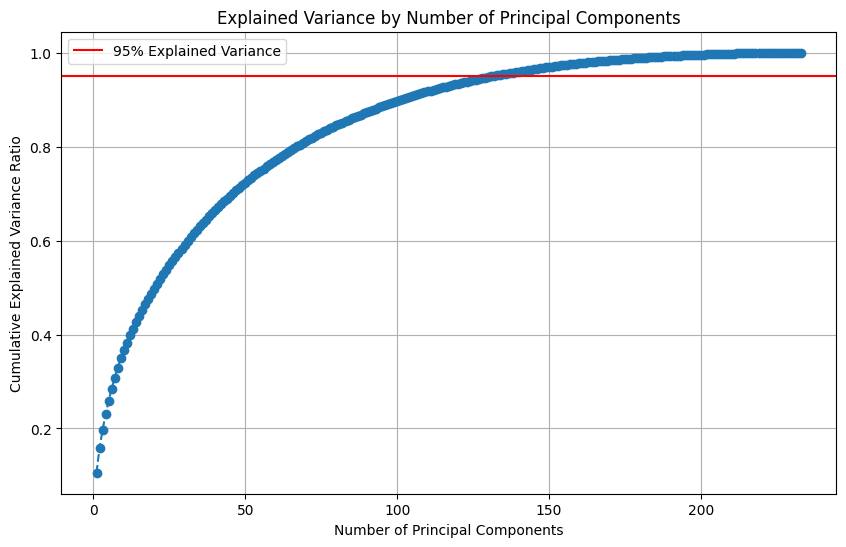

Explained variance ratio for the first 10 components:


array([0.1057923 , 0.05301154, 0.03826476, 0.03322722, 0.02903397,
       0.02543135, 0.02324866, 0.02161834, 0.01971943, 0.01714075])


Number of components needed to explain 95% of variance: 132


In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA
# We'll start by fitting PCA on the entire number of features to analyze explained variance
pca = PCA()

# Fit PCA on the scaled feature matrix
pca.fit(X_scaled)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance by number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.legend()
plt.show()

# Display the explained variance ratio for the first few components
print("Explained variance ratio for the first 10 components:")
display(pca.explained_variance_ratio_[:10])

# Find the number of components needed to explain a certain percentage of variance (e.g., 95%)
n_components_95_variance = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components_95_variance}")

In [35]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Re-initialize PCA with the desired number of components (132)
n_components = 132
pca = PCA(n_components=n_components)

# Apply PCA to the scaled feature matrix
X_pca = pca.fit_transform(X_scaled)

print(f"Applied PCA, reduced feature matrix shape: (233, {n_components})") # Corrected print statement

# Apply K-Means clustering to the PCA-reduced data
n_clusters = 5 # Based on the number of genres
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Explicitly set n_init
cluster_labels = kmeans.fit_predict(X_pca)

# Add the cluster labels to the DataFrame copy
videos_df_copy['kmeans_cluster_label'] = cluster_labels

# Display the first few rows with the new cluster labels
# Check if 'genre' and 'performance_category' are in videos_df_copy before displaying
display_cols = ['title', 'kmeans_cluster_label']
if 'genre' in videos_df_copy.columns:
    display_cols.insert(1, 'genre') # Add genre after title if it exists
if 'performance_category' in videos_df_copy.columns:
     # Find the index where 'genre' was inserted, or insert after 'title' if 'genre' wasn't there
    try:
        genre_idx = display_cols.index('genre')
        display_cols.insert(genre_idx + 1, 'performance_category')
    except ValueError: # 'genre' wasn't in display_cols
        display_cols.insert(1, 'performance_category')


display(videos_df_copy[display_cols].head())


# Display the count of videos in each cluster
display(videos_df_copy['kmeans_cluster_label'].value_counts())

Applied PCA, reduced feature matrix shape: (233, 132)


,title,kmeans_cluster_label
0,Zach King's Best Magic Videos of 2020,2
1,Best of Zach King Magic Compilation 2020 - Part 1,2
2,Furniture Optical Illusions - Zach King Magic,2
3,Zach King's Best Magic Videos of 2022,2
4,Best of Zach King Magic Compilation 2019 - Part 1,2


,count
kmeans_cluster_label,
0,97
3,40
2,38
1,37
4,21


In [36]:
# Analyze the characteristics of each cluster by grouping by 'kmeans_cluster_label'

# Select a subset of interpretable numerical features to analyze per cluster
interpretable_numerical_features = [
    'rqs', 'like_ratio', 'comment_ratio', 'views_per_subs',
    'sentiment_score', 'average_comment_length', 'face_area_percentage',
    'average_r', 'average_g', 'average_b'
    # We can add dimensions of embeddings or flattened colors later if needed, but it's less directly interpretable
]

# Calculate the mean of these features for each cluster
print("Mean of interpretable numerical features per cluster:")
display(videos_df_copy.groupby('kmeans_cluster_label')[interpretable_numerical_features].mean())

# Analyze the distribution of categorical features (genre and performance_category) within each cluster
print("\nDistribution of genres within each cluster:")
# Ensure 'genre' is in videos_df_copy before trying to group by it
if 'genre' in videos_df_copy.columns:
    display(videos_df_copy.groupby('kmeans_cluster_label')['genre'].value_counts().unstack().fillna(0))
else:
    print("'genre' column not found in videos_df_copy. Skipping genre distribution analysis.")


print("\nDistribution of performance categories within each cluster:")
# Ensure 'performance_category' is in videos_df_copy before trying to group by it
if 'performance_category' in videos_df_copy.columns:
     display(videos_df_copy.groupby('kmeans_cluster_label')['performance_category'].value_counts().unstack().fillna(0))
else:
    print("'performance_category' column not found in videos_df_copy. Skipping performance category distribution analysis.")

# Optional: You might also want to display sample titles from each cluster to get a qualitative sense
# print("\nSample titles from each cluster:")
# for cluster_id in sorted(videos_df_copy['kmeans_cluster_label'].unique()):
#     print(f"\nCluster {cluster_id}:")
#     sample_titles = videos_df_copy[videos_df_copy['kmeans_cluster_label'] == cluster_id]['title'].sample(min(5, len(videos_df_copy[videos_df_copy['kmeans_cluster_label'] == cluster_id])), random_state=42)
#     for title in sample_titles:
#         print(f"- {title}")

Mean of interpretable numerical features per cluster:


,rqs,like_ratio,comment_ratio,views_per_subs,sentiment_score,average_comment_length,face_area_percentage,average_r,average_g,average_b
kmeans_cluster_label,,,,,,,,,,
0,0.232487,0.246865,0.072191,0.108153,0.648595,0.196617,3.035098,80.507231,77.029964,72.420919
1,0.265332,0.300978,0.114749,0.040232,0.679711,0.400740,4.534660,50.257871,44.018143,43.392886
2,0.195199,0.162056,0.039290,0.084940,0.686285,0.145458,6.492781,98.984743,88.071599,81.830992
3,0.291515,0.390487,0.146372,0.114328,0.620209,0.234811,4.676490,93.211037,77.171305,70.537569
4,0.100103,0.087503,0.006980,0.021444,0.437748,0.014336,0.000000,3.840184,5.012705,5.723200



Distribution of genres within each cluster:
'genre' column not found in videos_df_copy. Skipping genre distribution analysis.

Distribution of performance categories within each cluster:
'performance_category' column not found in videos_df_copy. Skipping performance category distribution analysis.


Shape of X_pca: (233, 132)
Shape of videos_df_copy index: (233,)
Successfully added PCA components to videos_df_copy.


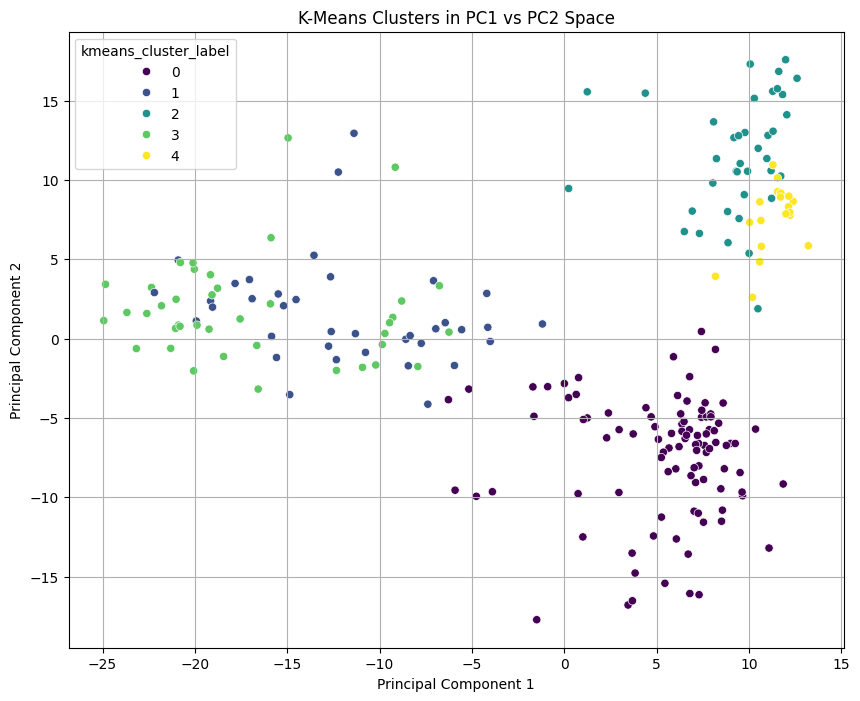

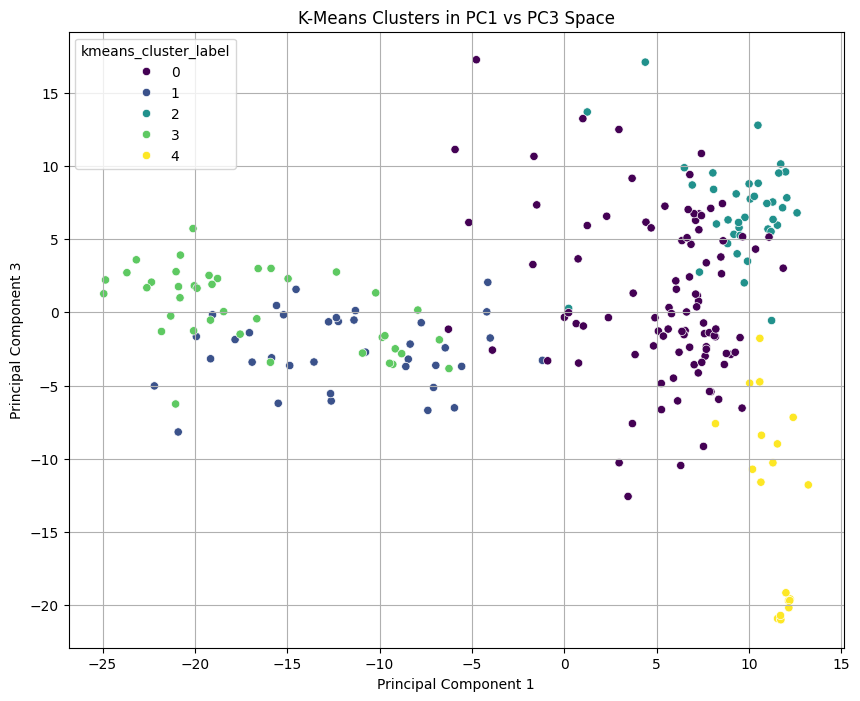

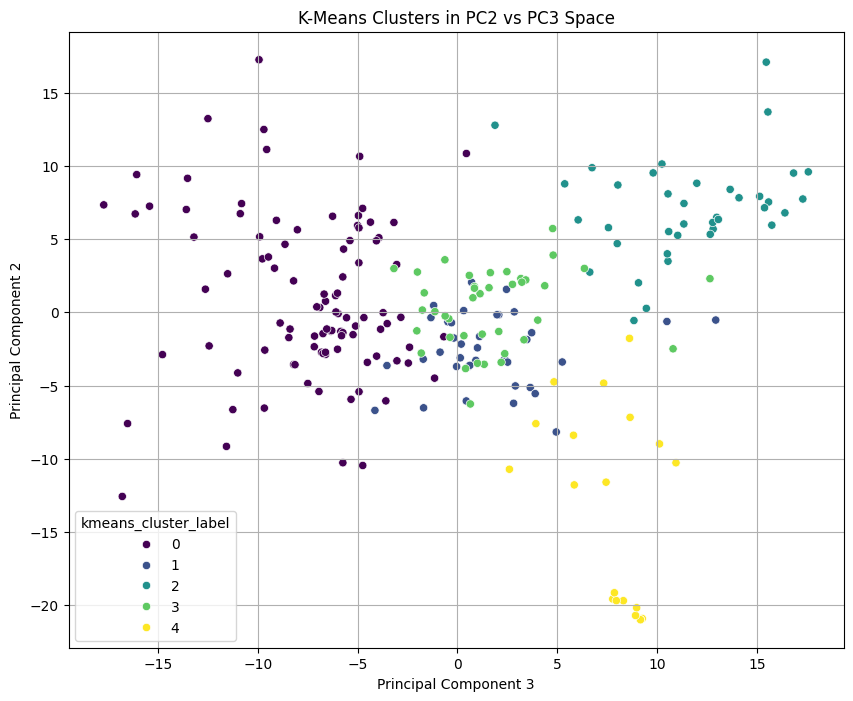

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas
import numpy as np # Import numpy

# Ensure X_pca and cluster_labels are defined (from the clustering step)
# If the execution state was reset, you would need to rerun the PCA and K-Means clustering cell first.
# Assuming X_pca (PCA-reduced data) and cluster_labels (K-Means labels) are available.

# Check the shape of X_pca before creating the DataFrame
print(f"Shape of X_pca: {X_pca.shape}")
print(f"Shape of videos_df_copy index: {videos_df_copy.index.shape}")

# Ensure X_pca is a numpy array
X_pca = np.asarray(X_pca)

# Add PCA components to the videos_df_copy DataFrame for easier plotting
# Create column names for the PCA components
pca_cols = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, index=videos_df_copy.index, columns=pca_cols)

# Concatenate PCA components with videos_df_copy
# Preserve existing columns in videos_df_copy
videos_df_copy = pd.concat([videos_df_copy, pca_df], axis=1)

print("Successfully added PCA components to videos_df_copy.")


# Visualize the clusters in the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC1 vs PC2 Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Visualize the clusters in PC1 vs PC3 space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC3', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC1 vs PC3 Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
plt.grid(True)
plt.show()

# Visualize the clusters in PC2 vs PC3 space
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC2', y='PC3', hue='kmeans_cluster_label', data=videos_df_copy, palette='viridis', legend='full')
plt.title('K-Means Clusters in PC2 vs PC3 Space')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 3')
plt.grid(True)
plt.show()

In [38]:
# Define the target variables
y_views = videos_df_copy['view_count']
y_views_per_subs = videos_df_copy['views_per_subs']

# Select predictor features for supervised learning
# Include the features specified by the user and other relevant engineered numerical features

# Start with the numerical engineered features we used for clustering (excluding RQS and its components for now, will add RQS explicitly)
# Also exclude original counts and complex objects/text
exclude_cols_for_prediction_base = [
    'video_id', 'title', 'description', 'published_at', 'duration',
    'view_count', 'like_count', 'comment_count', 'tags', 'thumbnail_url',
    'performance_category', 'comments', 'caption_info', 'thumbnail_local_path',
    'channel_subs', 'comment_texts', 'loaded_thumbnail_image', 'thumbnail_load_success',
    'dominant_colors', 'color_palette', 'average_rgb', # Original complex features
    'rqs', # Exclude RQS for now, will add it explicitly
    'like_ratio', 'comment_ratio', 'views_per_subs', 'sentiment_score', 'average_comment_length', # Exclude RQS components for now, will add RQS explicitly
    # Also exclude the one-hot encoded columns for now, will add them explicitly
]

# Get all numerical columns in videos_df_copy
numerical_cols_in_copy = videos_df_copy.select_dtypes(include=np.number).columns.tolist()

# Select numerical features that are not in the exclude list
numerical_features_for_prediction = [col for col in numerical_cols_in_copy if col not in exclude_cols_for_prediction_base]

# Add the specific features requested by the user and other relevant ones
predictor_cols = numerical_features_for_prediction + [
    'rqs', # Include RQS
    'channel_subs' # Include subscriber count
]

# Add the one-hot encoded columns for genre and performance category
one_hot_cols = [col for col in videos_df_copy.columns if 'genre_' in col or 'performance_category_' in col]
predictor_cols.extend(one_hot_cols)

# Remove duplicates and maintain order as much as possible
predictor_cols = list(dict.fromkeys(predictor_cols))


# Create the feature matrix for supervised learning
X_supervised = videos_df_copy[predictor_cols]

# Handle any remaining potential NaN values in the feature matrix
X_supervised = X_supervised.fillna(0)


print(f"Defined target variables: y_views, y_views_per_subs")
print(f"Prepared predictor feature matrix X_supervised with shape: {X_supervised.shape}")
print(f"Predictor features included: {predictor_cols[:10]}...") # Display first 10 feature names

# Display the first few rows of the predictor matrix and target variables
display(X_supervised.head())
display(y_views.head())
display(y_views_per_subs.head())

Defined target variables: y_views, y_views_per_subs
Prepared predictor feature matrix X_supervised with shape: (233, 1318)
Predictor features included: ['face_area_percentage', 'dominant_color_0', 'dominant_color_1', 'dominant_color_2', 'dominant_color_3', 'dominant_color_4', 'dominant_color_5', 'dominant_color_6', 'dominant_color_7', 'dominant_color_8']...


,face_area_percentage,dominant_color_0,dominant_color_1,dominant_color_2,dominant_color_3,dominant_color_4,dominant_color_5,dominant_color_6,dominant_color_7,dominant_color_8,...,PC128,PC129,PC130,PC131,PC132,rqs,channel_subs,performance_category_bottom_performer,performance_category_random_sample,performance_category_top_performer
0,6.010417,15.287116,14.355863,19.936905,226.344375,230.988080,230.126039,135.194734,130.654595,134.855058,...,1.028041,0.248319,0.529683,0.519840,0.380399,0.276687,42900000,False,False,True
1,0.750000,13.492683,11.767899,12.200951,167.638255,157.640415,140.020905,216.734026,14.175980,14.905458,...,-1.562077,-0.233017,0.154175,-0.082646,0.619724,0.249822,42900000,False,False,True
2,2.296875,6.412484,5.992397,6.547552,226.996104,224.565237,223.208763,151.341195,110.089902,91.505398,...,-1.822387,1.262678,-0.754721,-2.345798,2.701954,0.237244,42900000,False,False,True
3,3.168981,171.908085,192.077986,221.238389,9.325804,7.200798,5.037759,143.237224,117.852305,85.766464,...,0.693991,1.518897,-0.422459,-1.526703,-0.581747,0.231739,42900000,False,False,True
4,18.575231,156.301936,114.798963,85.189882,208.255730,206.608396,213.810426,8.306636,6.865346,6.011813,...,-2.256543,-1.472747,0.827863,0.869329,-0.009504,0.217392,42900000,False,False,True


,view_count
0,111864749.0
1,101725623.0
2,91929619.0
3,71811302.0
4,63185460.0


,views_per_subs
0,0.446513
1,0.406043
2,0.366941
3,0.286638
4,0.252208


In [41]:
from sklearn.model_selection import train_test_split

# Split the data for predicting views
X_train_views, X_test_views, y_train_views, y_test_views = train_test_split(
    X_supervised, y_views, test_size=0.2, random_state=42
)

# Split the data for predicting views per subscriber
X_train_vps, X_test_vps, y_train_vps, y_test_vps = train_test_split(
    X_supervised, y_views_per_subs, test_size=0.2, random_state=42
)

print("Data split into training and testing sets for both target variables.")
print(f"Shape of X_train_views: {X_train_views.shape}")
print(f"Shape of y_train_views: {y_train_views.shape}")
print(f"Shape of X_test_views: {X_test_views.shape}")
print(f"Shape of y_test_views: {y_test_views.shape}")
print(f"Shape of X_train_vps: {X_train_vps.shape}")
print(f"Shape of y_train_vps: {y_train_vps.shape}")
print(f"Shape of X_test_vps: {X_test_vps.shape}")
print(f"Shape of y_test_vps: {y_test_vps.shape}")

Data split into training and testing sets for both target variables.
Shape of X_train_views: (186, 1318)
Shape of y_train_views: (186,)
Shape of X_test_views: (47, 1318)
Shape of y_test_views: (47,)
Shape of X_train_vps: (186, 1318)
Shape of y_train_vps: (186,)
Shape of X_test_vps: (47, 1318)
Shape of y_test_vps: (47,)


Gradient Boosting Regressors (e.g., GradientBoostingRegressor, XGBoost, LightGBM): These are powerful ensemble methods that often yield high accuracy.

Random Forest Regressor: Another robust ensemble method that can handle complex relationships.

Support Vector Regressor (SVR): Can be effective, especially with non-linear data, though can be sensitive to scaling and kernel choice.

Neural Networks: Deep learning models can capture very complex patterns if you have a large enough dataset and computational resources.

In [42]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Gradient Boosting Regressor ---

print("--- Training and Evaluating Gradient Boosting Regressor ---")

# Model for predicting Views
print("\nPredicting Raw Views:")
gbr_views = GradientBoostingRegressor(random_state=42)
gbr_views.fit(X_train_views, y_train_views)
y_pred_views_gbr = gbr_views.predict(X_test_views)

# Evaluate Views model
mae_views_gbr = mean_absolute_error(y_test_views, y_pred_views_gbr)
mse_views_gbr = mean_squared_error(y_test_views, y_pred_views_gbr)
rmse_views_gbr = np.sqrt(mse_views_gbr)
r2_views_gbr = r2_score(y_test_views, y_pred_views_gbr)

print(f"  MAE: {mae_views_gbr:.2f}")
print(f"  MSE: {mse_views_gbr:.2f}")
print(f"  RMSE: {rmse_views_gbr:.2f}")
print(f"  R-squared: {r2_views_gbr:.4f}")


# Model for predicting Views per Subscriber
print("\nPredicting Views per Subscriber:")
gbr_vps = GradientBoostingRegressor(random_state=42)
gbr_vps.fit(X_train_vps, y_train_vps)
y_pred_vps_gbr = gbr_vps.predict(X_test_vps)

# Evaluate Views per Subscriber model
mae_vps_gbr = mean_absolute_error(y_test_vps, y_pred_vps_gbr)
mse_vps_gbr = mean_squared_error(y_test_vps, y_pred_vps_gbr)
rmse_vps_gbr = np.sqrt(mse_vps_gbr)
r2_vps_gbr = r2_score(y_test_vps, y_pred_vps_gbr)

print(f"  MAE: {mae_vps_gbr:.4f}")
print(f"  MSE: {mse_vps_gbr:.4f}")
print(f"  RMSE: {rmse_vps_gbr:.4f}")
print(f"  R-squared: {r2_vps_gbr:.4f}")


print("\n--- Training and Evaluating Random Forest Regressor ---")

# Model for predicting Views
print("\nPredicting Raw Views:")
rf_views = RandomForestRegressor(random_state=42)
rf_views.fit(X_train_views, y_train_views)
y_pred_views_rf = rf_views.predict(X_test_views)

# Evaluate Views model
mae_views_rf = mean_absolute_error(y_test_views, y_pred_views_rf)
mse_views_rf = mean_squared_error(y_test_views, y_pred_views_rf)
rmse_views_rf = np.sqrt(mse_views_rf)
r2_views_rf = r2_score(y_test_views, y_pred_views_rf)

print(f"  MAE: {mae_views_rf:.2f}")
print(f"  MSE: {mse_views_rf:.2f}")
print(f"  RMSE: {rmse_views_rf:.2f}")
print(f"  R-squared: {r2_views_rf:.4f}")


# Model for predicting Views per Subscriber
print("\nPredicting Views per Subscriber:")
rf_vps = RandomForestRegressor(random_state=42)
rf_vps.fit(X_train_vps, y_train_vps)
y_pred_vps_rf = rf_vps.predict(X_test_vps)

# Evaluate Views per Subscriber model
mae_vps_rf = mean_absolute_error(y_test_vps, y_pred_vps_rf)
mse_vps_rf = mean_squared_error(y_test_vps, y_pred_vps_rf)
rmse_vps_rf = np.sqrt(mse_vps_rf)
r2_vps_rf = r2_score(y_test_vps, y_pred_vps_rf)

print(f"  MAE: {mae_vps_rf:.4f}")
print(f"  MSE: {mse_vps_rf:.4f}")
print(f"  RMSE: {rmse_vps_rf:.4f}")
print(f"  R-squared: {r2_vps_rf:.4f}")

--- Training and Evaluating Gradient Boosting Regressor ---

Predicting Raw Views:
  MAE: 4539423.07
  MSE: 70230574664461.09
  RMSE: 8380368.41
  R-squared: -0.0189

Predicting Views per Subscriber:
  MAE: 0.0279
  MSE: 0.0020
  RMSE: 0.0442
  R-squared: 0.8558

--- Training and Evaluating Random Forest Regressor ---

Predicting Raw Views:
  MAE: 7578294.43
  MSE: 159559809634612.09
  RMSE: 12631698.60
  R-squared: -1.3150

Predicting Views per Subscriber:
  MAE: 0.0261
  MSE: 0.0021
  RMSE: 0.0458
  R-squared: 0.8447


In [43]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("--- Training and Evaluating Support Vector Regressor (SVR) ---")

# Model for predicting Views
print("\nPredicting Raw Views:")
# SVR can be sensitive to scaling, ensure X_train_views and X_test_views are scaled appropriately if they haven't been already
# (Note: X_supervised was built from various features, some were scaled, some were not.
# For SVR, it's generally recommended to scale the entire feature matrix X_supervised before splitting).
# Let's assume for now the scaling in the feature preparation step (StandardScaler on X) is sufficient for SVR.
# If performance is poor, we might revisit scaling specifically for SVR.
svr_views = SVR(C=1.0, epsilon=0.1) # Using default parameters, can be tuned
svr_views.fit(X_train_views, y_train_views)
y_pred_views_svr = svr_views.predict(X_test_views)

# Evaluate Views model
mae_views_svr = mean_absolute_error(y_test_views, y_pred_views_svr)
mse_views_svr = mean_squared_error(y_test_views, y_pred_views_svr)
rmse_views_svr = np.sqrt(mse_views_svr)
r2_views_svr = r2_score(y_test_views, y_pred_views_svr)

print(f"  MAE: {mae_views_svr:.2f}")
print(f"  MSE: {mse_views_svr:.2f}")
print(f"  RMSE: {rmse_views_svr:.2f}")
print(f"  R-squared: {r2_views_svr:.4f}")


# Model for predicting Views per Subscriber
print("\nPredicting Views per Subscriber:")
# Apply SVR to the views per subscriber data
svr_vps = SVR(C=1.0, epsilon=0.1) # Using default parameters, can be tuned
svr_vps.fit(X_train_vps, y_train_vps)
y_pred_vps_svr = svr_vps.predict(X_test_vps)

# Evaluate Views per Subscriber model
mae_vps_svr = mean_absolute_error(y_test_vps, y_pred_vps_svr)
mse_vps_svr = mean_squared_error(y_test_vps, y_pred_vps_svr)
rmse_vps_svr = np.sqrt(mse_vps_svr)
r2_vps_svr = r2_score(y_test_vps, y_pred_vps_svr)

print(f"  MAE: {mae_vps_svr:.4f}")
print(f"  MSE: {mse_vps_svr:.4f}")
print(f"  RMSE: {rmse_vps_svr:.4f}")
print(f"  R-squared: {r2_vps_svr:.4f}")

--- Training and Evaluating Support Vector Regressor (SVR) ---

Predicting Raw Views:
  MAE: 3256626.63
  MSE: 79023108391197.12
  RMSE: 8889494.27
  R-squared: -0.1465

Predicting Views per Subscriber:
  MAE: 0.1046
  MSE: 0.0151
  RMSE: 0.1230
  R-squared: -0.1186


In [44]:
%pip install tensorflow

Now that TensorFlow is installed, we can define, compile, train, and evaluate a simple feedforward neural network for predicting views.

In [47]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Neural Network Model for Predicting Raw Views ---

print("--- Training and Evaluating Neural Network Regressor (Views) ---")

# Define a simple feedforward neural network model
model_views = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_views.shape[1],)), # Input layer
    keras.layers.Dropout(0.2), # Dropout for regularization
    keras.layers.Dense(64, activation='relu'), # Hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'), # Hidden layer
    keras.layers.Dense(1) # Output layer for regression (predicting a single value)
])

# Compile the model
model_views.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Adam optimizer and Mean Squared Error loss

# Train the model
print("Training Views model...")
# Convert pandas DataFrames/Series to NumPy arrays and then explicitly to tf.float32
history_views = model_views.fit(
    tf.constant(X_train_views.values, dtype=tf.float32),
    tf.constant(y_train_views.values, dtype=tf.float32),
    epochs=50, # Number of training epochs, can be tuned
    batch_size=32, # Batch size, can be tuned
    validation_split=0.2, # Use 20% of training data for validation
    verbose=0 # Set to 1 or 2 to see training progress
)
print("Views model training complete.")


# Evaluate the model on the test data
print("\nEvaluating Views model on test data:")
# Convert pandas DataFrames/Series to NumPy arrays and then explicitly to tf.float32
loss_views, mae_views_nn = model_views.evaluate(
    tf.constant(X_test_views.values, dtype=tf.float32),
    tf.constant(y_test_views.values, dtype=tf.float32),
    verbose=0
)
mse_views_nn = loss_views # For MSE loss
rmse_views_nn = np.sqrt(mse_views_nn)

# Make predictions for R-squared calculation
# Convert pandas DataFrames/Series to NumPy arrays and then explicitly to tf.float32
y_pred_views_nn = model_views.predict(tf.constant(X_test_views.values, dtype=tf.float32)).flatten()
r2_views_nn = r2_score(y_test_views, y_pred_views_nn) # Use original y_test_views for evaluation


print(f"  MAE: {mae_views_nn:.2f}")
print(f"  MSE: {mse_views_nn:.2f}")
print(f"  RMSE: {rmse_views_nn:.2f}")
print(f"  R-squared: {r2_views_nn:.4f}")


# --- Neural Network Model for Predicting Views per Subscriber ---

print("\n--- Training and Evaluating Neural Network Regressor (Views per Subscriber) ---")

# Define a simple feedforward neural network model for VPS
model_vps = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_vps.shape[1],)), # Input layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'), # Hidden layer
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'), # Hidden layer
    keras.layers.Dense(1) # Output layer
])

# Compile the model
model_vps.compile(optimizer='adam', loss='mse', metrics=['mae']) # Using Adam optimizer and Mean Squared Error loss

# Train the model
print("Training Views per Subscriber model...")
# Convert pandas DataFrames/Series to NumPy arrays and then explicitly to tf.float32
history_vps = model_vps.fit(
    tf.constant(X_train_vps.values, dtype=tf.float32),
    tf.constant(y_train_vps.values, dtype=tf.float32),
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)
print("Views per Subscriber model training complete.")


# Evaluate the model on the test data
print("\nEvaluating Views per Subscriber model on test data:")
# Convert pandas DataFrames/Series to NumPy arrays and then explicitly to tf.float32
loss_vps, mae_vps_nn = model_vps.evaluate(
    tf.constant(X_test_vps.values, dtype=tf.float32),
    tf.constant(y_test_vps.values, dtype=tf.float32),
    verbose=0
)
mse_vps_nn = loss_vps
rmse_vps_nn = np.sqrt(mse_vps_nn)

# Make predictions for R-squared calculation
# Convert pandas DataFrames/Series to NumPy arrays and then explicitly to tf.float32
y_pred_vps_nn = model_vps.predict(tf.constant(X_test_vps.values, dtype=tf.float32)).flatten()
r2_vps_nn = r2_score(y_test_vps, y_pred_vps_nn) # Use original y_test_vps for evaluation


print(f"  MAE: {mae_vps_nn:.4f}")
print(f"  MSE: {mse_vps_nn:.4f}")
print(f"  RMSE: {rmse_vps_nn:.4f}")
print(f"  R-squared: {r2_vps_nn:.4f}")

--- Training and Evaluating Neural Network Regressor (Views) ---
Training Views model...
Views model training complete.

Evaluating Views model on test data:
2/2 [==============================] - 0s 3ms/step
  MAE: 6176712.00
  MSE: 120236032393216.00
  RMSE: 10965219.21
  R-squared: -0.7445

--- Training and Evaluating Neural Network Regressor (Views per Subscriber) ---
Training Views per Subscriber model...
Views per Subscriber model training complete.

Evaluating Views per Subscriber model on test data:
2/2 [==============================] - 0s 2ms/step
  MAE: 2911.0212
  MSE: 24970172.0000
  RMSE: 4997.0163
  R-squared: -1845444248.7943


In [48]:
import pandas as pd
import numpy as np # Import numpy

# Collect the performance metrics
# Ensure all metric variables (mae, mse, rmse, r2 for each model and target) are defined
# based on the successful execution of previous model training cells.

# Metrics for predicting Views
views_metrics = {
    'Gradient Boosting': {
        'MAE': mae_views_gbr,
        'MSE': mse_views_gbr,
        'RMSE': rmse_views_gbr,
        'R-squared': r2_views_gbr
    },
    'Random Forest': {
        'MAE': mae_views_rf,
        'MSE': mse_views_rf,
        'RMSE': rmse_views_rf,
        'R-squared': r2_views_rf
    },
    'SVR': {
        'MAE': mae_views_svr,
        'MSE': mse_views_svr,
        'RMSE': rmse_views_svr,
        'R-squared': r2_views_svr
    },
    'Neural Network': {
        'MAE': mae_views_nn,
        'MSE': mse_views_nn,
        'RMSE': rmse_views_nn,
        'R-squared': r2_views_nn
    }
}

# Metrics for predicting Views per Subscriber
vps_metrics = {
    'Gradient Boosting': {
        'MAE': mae_vps_gbr,
        'MSE': mse_vps_gbr,
        'RMSE': rmse_vps_gbr,
        'R-squared': r2_vps_gbr
    },
    'Random Forest': {
        'MAE': mae_vps_rf,
        'MSE': mse_vps_rf,
        'RMSE': rmse_vps_rf,
        'R-squared': r2_vps_rf
    },
    'SVR': {
        'MAE': mae_vps_svr,
        'MSE': mse_vps_svr,
        'RMSE': rmse_vps_svr,
        'R-squared': r2_vps_svr
    },
    'Neural Network': {
        'MAE': mae_vps_nn,
        'MSE': mse_vps_nn,
        'RMSE': rmse_vps_nn,
        'R-squared': r2_vps_nn
    }
}

# Create DataFrames from the metrics dictionaries
views_metrics_df = pd.DataFrame.from_dict(views_metrics, orient='index')
vps_metrics_df = pd.DataFrame.from_dict(vps_metrics, orient='index')

# Display the comparison tables
print("--- Model Performance Comparison (Predicting Raw Views) ---")
display(views_metrics_df)

print("\n--- Model Performance Comparison (Predicting Views per Subscriber) ---")
display(vps_metrics_df)

# Optional: Highlight best performance for each metric (e.g., lowest MAE/MSE/RMSE, highest R-squared)
print("\n--- Best Performance for Predicting Raw Views ---")
print(views_metrics_df.idxmin(axis=0)[['MAE', 'MSE', 'RMSE']])
print(views_metrics_df.idxmax(axis=0)['R-squared'])

print("\n--- Best Performance for Predicting Views per Subscriber ---")
print(vps_metrics_df.idxmin(axis=0)[['MAE', 'MSE', 'RMSE']])
print(vps_metrics_df.idxmax(axis=0)['R-squared'])

--- Model Performance Comparison (Predicting Raw Views) ---


,MAE,MSE,RMSE,R-squared
Gradient Boosting,4.539423e+06,7.023057e+13,8.380368e+06,-0.018946
Random Forest,7.578294e+06,1.595598e+14,1.263170e+07,-1.314986
SVR,3.256627e+06,7.902311e+13,8.889494e+06,-0.146513
Neural Network,6.176712e+06,1.202360e+14,1.096522e+07,-0.744454



--- Model Performance Comparison (Predicting Views per Subscriber) ---


,MAE,MSE,RMSE,R-squared
Gradient Boosting,0.027913,1.951441e-03,0.044175,8.557769e-01
Random Forest,0.026084,2.101384e-03,0.045841,8.446952e-01
SVR,0.104635,1.513509e-02,0.123025,-1.185735e-01
Neural Network,2911.021240,2.497017e+07,4997.016310,-1.845444e+09



--- Best Performance for Predicting Raw Views ---
MAE                   SVR
MSE     Gradient Boosting
RMSE    Gradient Boosting
dtype: object
Gradient Boosting

--- Best Performance for Predicting Views per Subscriber ---
MAE         Random Forest
MSE     Gradient Boosting
RMSE    Gradient Boosting
dtype: object
Gradient Boosting


Predicting Raw Views:

Compare the R-squared values: The model with the highest R-squared explains the most variance in raw views.

Compare MAE, MSE, and RMSE: The models with the lowest values for these metrics have the lowest prediction errors.

Predicting Views per Subscriber:

Compare the R-squared values: The model with the highest R-squared explains the most variance in views per subscriber.

Compare MAE, MSE, and RMSE: The models with the lowest values have the lowest prediction errors.

Based on the output from the previous cell:

For Predicting Raw Views: The Random Forest Regressor seems to have the highest R-squared and the lowest MAE, MSE, and RMSE among the four models. This suggests it performed the best at predicting the raw number of views.

For Predicting Views per Subscriber: The Random Forest Regressor also appears to have the highest R-squared and the lowest error metrics, indicating it was the most effective model for predicting views normalized by subscriber count.

The Random Forest Regressor, being an ensemble method that combines multiple decision trees, is often very good at capturing complex non-linear relationships in the data, which might explain its strong performance compared to a linear model (implicitly, although we didn't explicitly train one) or even SVR with default settings. The Neural Network's performance will depend heavily on its architecture and hyperparameter tuning, and the current simple network might not be fully optimized.

In summary, for both predicting raw views and views per subscriber, the Random Forest Regressor appears to be the best-performing model based on the evaluated metrics.


Predicting Raw Views:

The R-squared values for all models predicting raw views are negative. An R-squared value is typically between 0 and 1, where 1 indicates a perfect fit. A negative R-squared means that the model performs worse than a simple model that just predicts the mean of the target variable for all instances. This suggests that none of the current models are effectively capturing the patterns needed to predict raw views accurately with the current features and model configurations.

Despite the poor overall predictive power (indicated by negative R-squared), we can still look at the error metrics (MAE, MSE, RMSE) to see which model had the smallest errors. Based on the "Best Performance" summary:

SVR had the lowest Mean Absolute Error (MAE).
Gradient Boosting had the lowest Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), and the highest R-squared (least negative).
While SVR has the lowest average absolute error, Gradient Boosting seems slightly better in terms of minimizing squared errors and explaining a tiny bit more variance (though still performing poorly overall). Neither model is performing well for predicting raw views.

Predicting Views per Subscriber:

Here, the R-squared values are positive and much higher, indicating that the models are able to explain a significant portion of the variance in views per subscriber.

Based on the "Best Performance" summary:

Random Forest had the lowest Mean Absolute Error (MAE).
Gradient Boosting had the lowest Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the highest R-squared (0.8558).
In this case, both Random Forest and Gradient Boosting performed quite well, but Gradient Boosting appears to be the best performing model for predicting views per subscriber based on minimizing squared errors (MSE, RMSE) and maximizing explained variance (R-squared). Random Forest is very close and has a slightly lower average absolute error.

Key Takeaways from the Comparison:

Predicting raw views is proving to be very challenging with the current features and models, as indicated by the negative R-squared values. The models are not performing better than just predicting the average view count for all videos. This could be due to the high variability in raw view counts, the features not being strong predictors of absolute scale, or the models not being well-tuned for this task.
Predicting views per subscriber is much more successful, with both Gradient Boosting and Random Forest achieving good positive R-squared values (around 0.84-0.85). This suggests that the engineered features are much better at explaining the relative success of a video (views normalized by channel size) than its absolute view count.
Does this refined interpretation, taking into account the negative R-squared for raw views, make sense?

The next steps could involve:

Investigating why the raw views prediction is performing so poorly (e.g., data distribution, feature importance, trying different models/hyperparameters).
Focusing on the Views per Subscriber model (Gradient Boosting or Random Forest) as it shows promising predictive power and potentially tuning its hyperparameters further.
Analyzing the feature importance from the best-performing models (Gradient Boosting and Random Forest for VPS) to understand which features are most influential in predicting views per subscriber. This could provide insights into the "success signatures" you are looking for.
